In [2]:
import os
print("📂 Estoy en:", os.getcwd())


📂 Estoy en: c:\Users\evaru\OneDrive\Escritorio\sismiaio\src\experimentos\entrenamientos\v5_training


In [3]:
import os
os.chdir("../../../..")  # Sube tres niveles hasta llegar a la raíz del proyecto
print("📍 Nueva ubicación:", os.getcwd())


📍 Nueva ubicación: c:\Users\evaru\OneDrive\Escritorio\sismiaio


In [4]:
# 📦 Librerías
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

PATH_REAL = Path("C:/Users/evaru/OneDrive/Escritorio/sismiaio/data/clean/dataset_modelo.csv")
PATH_SIM = Path("C:/Users/evaru/OneDrive/Escritorio/sismiaio/stats/datasets/simulacion_datos_girona.csv")
MODEL_PATH = Path("C:/Users/evaru/OneDrive/Escritorio/sismiaio/src/models/prediccion_reglineal_asistencias_girona.pkl")

# 📥 Cargar y limpiar datos
df_real = pd.read_csv(PATH_REAL, parse_dates=["FECHA_EVENTO"])
df_sim = pd.read_csv(PATH_SIM, parse_dates=["FECHA_EVENTO"])

In [5]:
print(df_real.head())
df_real.describe()

                     NOMBRE_EVENTO FECHA_EVENTO COMUNIDAD  \
0  Afterwork Run By Dash And Stars   2025-04-17     ELCHE   
1               Dash And Stars Run   2025-02-09    GIRONA   
2        Dimecres Morning Run  Cet   2024-05-01    GIRONA   
3      Els Dimecres Amb Sisterhood   2024-02-14    GIRONA   
4      Els Dimecres Amb Sisterhood   2024-02-21    GIRONA   

                                      ARCHIVO_ORIGEN  COSTE_UNITARIO  \
0  afterwork-run-by-dash-and-stars-17-dabril-del-...             7.0   
1  dash-and-stars-run-09-de-febrer-del-2025-2ec66...             9.0   
2   dimecres-morning-run-01-de-maig-del-2024-cet.csv             0.0   
3  els-dimecres-amb-sisterhood-14-de-febrer-de-20...             0.0   
4  els-dimecres-amb-sisterhood-21-de-febrer-de-20...             0.0   

   NUM_INSCRITAS  NUM_PAGOS  NUM_ASISTENCIAS  TOTAL_RECAUDADO  DIA_MES  ...  \
0             12         12               11            180.0       17  ...   
1             25         25               

,FECHA_EVENTO,COSTE_UNITARIO,NUM_INSCRITAS,NUM_PAGOS,NUM_ASISTENCIAS,TOTAL_RECAUDADO,DIA_MES,SEMANA_MES,MES,AÑO,DIA_SEMANA_NUM,PRECIO_MEDIO,COSTE_ESTIMADO,BENEFICIO_ESTIMADO,EVENTO_GRATUITO,COLABORACION
count,95,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0
mean,2024-11-06 17:10:44.210526208,4.289474,11.336842,3.021053,10.431579,43.757895,15.568421,19.221053,4.800000,2024.494737,3.084211,1.821053,222.447368,-178.689474,0.873684,0.0
min,2024-02-14 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2024.000000,2.000000,0.000000,0.000000,-18240.000000,0.000000,0.0
25%,2024-06-08 12:00:00,0.000000,6.000000,0.000000,5.500000,0.000000,9.000000,10.000000,3.000000,2024.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,2024-12-22 00:00:00,0.000000,10.000000,0.000000,9.000000,0.000000,15.000000,17.000000,4.000000,2024.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,2025-03-19 12:00:00,0.000000,12.500000,0.000000,12.000000,0.000000,22.000000,23.500000,6.000000,2025.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,2025-06-08 00:00:00,300.000000,64.000000,64.000000,64.000000,960.000000,30.000000,51.000000,12.000000,2025.000000,6.000000,32.000000,19200.000000,540.000000,1.000000,0.0
std,NaN,30.906050,8.995993,9.722729,8.875801,143.546546,8.210855,12.040869,2.789036,0.502625,1.555109,5.321532,1968.984656,1873.830308,0.333967,0.0


In [6]:
df_sim.describe()

,FECHA_EVENTO,DIA_SEMANA_NUM,DIA_MES,SEMANA_MES,MES,AÑO,NUM_INSCRITAS,NUM_PAGOS,NUM_ASISTENCIAS,TOTAL_RECAUDADO,EVENTO_GRATUITO,COSTE_UNITARIO,COSTE_ESTIMADO,BENEFICIO_ESTIMADO,PRECIO_MEDIO,COLABORACION
count,300,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2023-06-17 07:12:00,3.316667,1.433333,24.000000,6.50000,2023.000000,23.690000,4.793333,20.400000,73.250567,0.800000,4.872829,114.317400,-41.066833,3.061233,0.213333
min,2021-01-01 00:00:00,0.000000,1.000000,0.000000,1.00000,2021.000000,14.000000,0.000000,11.000000,0.000000,0.000000,1.882143,50.170000,-149.850000,0.000000,0.000000
25%,2022-03-25 12:00:00,2.000000,1.000000,12.000000,3.75000,2022.000000,21.000000,0.000000,18.000000,0.000000,1.000000,3.485216,77.830000,-117.392500,0.000000,0.000000
50%,2023-06-17 00:00:00,4.000000,1.000000,24.000000,6.50000,2023.000000,23.000000,0.000000,20.000000,0.000000,1.000000,4.763833,109.615000,-86.930000,0.000000,0.000000
75%,2024-09-08 12:00:00,5.000000,1.000000,36.000000,9.25000,2024.000000,26.000000,0.000000,22.000000,0.000000,1.000000,5.910395,136.850000,-56.695000,0.000000,0.000000
max,2025-12-07 00:00:00,6.000000,7.000000,48.000000,12.00000,2025.000000,39.000000,34.000000,34.000000,545.200000,1.000000,11.218824,247.170000,403.460000,19.260000,1.000000
std,NaN,2.019070,1.261292,15.055083,3.45782,1.416576,4.493834,9.811465,3.738975,152.503158,0.400668,1.745176,44.399617,128.232565,6.262376,0.410346


In [7]:
df_real = df_real[df_sim.columns]


In [8]:
df_real.describe()

,FECHA_EVENTO,DIA_SEMANA_NUM,DIA_MES,SEMANA_MES,MES,AÑO,NUM_INSCRITAS,NUM_PAGOS,NUM_ASISTENCIAS,TOTAL_RECAUDADO,EVENTO_GRATUITO,COSTE_UNITARIO,COSTE_ESTIMADO,BENEFICIO_ESTIMADO,PRECIO_MEDIO,COLABORACION
count,95,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0
mean,2024-11-06 17:10:44.210526208,3.084211,15.568421,19.221053,4.800000,2024.494737,11.336842,3.021053,10.431579,43.757895,0.873684,4.289474,222.447368,-178.689474,1.821053,0.0
min,2024-02-14 00:00:00,2.000000,1.000000,2.000000,1.000000,2024.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-18240.000000,0.000000,0.0
25%,2024-06-08 12:00:00,2.000000,9.000000,10.000000,3.000000,2024.000000,6.000000,0.000000,5.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2024-12-22 00:00:00,2.000000,15.000000,17.000000,4.000000,2024.000000,10.000000,0.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2025-03-19 12:00:00,3.000000,22.000000,23.500000,6.000000,2025.000000,12.500000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,2025-06-08 00:00:00,6.000000,30.000000,51.000000,12.000000,2025.000000,64.000000,64.000000,64.000000,960.000000,1.000000,300.000000,19200.000000,540.000000,32.000000,0.0
std,NaN,1.555109,8.210855,12.040869,2.789036,0.502625,8.995993,9.722729,8.875801,143.546546,0.333967,30.906050,1968.984656,1873.830308,5.321532,0.0


In [9]:
df_sim.describe()

,FECHA_EVENTO,DIA_SEMANA_NUM,DIA_MES,SEMANA_MES,MES,AÑO,NUM_INSCRITAS,NUM_PAGOS,NUM_ASISTENCIAS,TOTAL_RECAUDADO,EVENTO_GRATUITO,COSTE_UNITARIO,COSTE_ESTIMADO,BENEFICIO_ESTIMADO,PRECIO_MEDIO,COLABORACION
count,300,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2023-06-17 07:12:00,3.316667,1.433333,24.000000,6.50000,2023.000000,23.690000,4.793333,20.400000,73.250567,0.800000,4.872829,114.317400,-41.066833,3.061233,0.213333
min,2021-01-01 00:00:00,0.000000,1.000000,0.000000,1.00000,2021.000000,14.000000,0.000000,11.000000,0.000000,0.000000,1.882143,50.170000,-149.850000,0.000000,0.000000
25%,2022-03-25 12:00:00,2.000000,1.000000,12.000000,3.75000,2022.000000,21.000000,0.000000,18.000000,0.000000,1.000000,3.485216,77.830000,-117.392500,0.000000,0.000000
50%,2023-06-17 00:00:00,4.000000,1.000000,24.000000,6.50000,2023.000000,23.000000,0.000000,20.000000,0.000000,1.000000,4.763833,109.615000,-86.930000,0.000000,0.000000
75%,2024-09-08 12:00:00,5.000000,1.000000,36.000000,9.25000,2024.000000,26.000000,0.000000,22.000000,0.000000,1.000000,5.910395,136.850000,-56.695000,0.000000,0.000000
max,2025-12-07 00:00:00,6.000000,7.000000,48.000000,12.00000,2025.000000,39.000000,34.000000,34.000000,545.200000,1.000000,11.218824,247.170000,403.460000,19.260000,1.000000
std,NaN,2.019070,1.261292,15.055083,3.45782,1.416576,4.493834,9.811465,3.738975,152.503158,0.400668,1.745176,44.399617,128.232565,6.262376,0.410346


In [10]:
df_sim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   NOMBRE_EVENTO       300 non-null    object        
 1   FECHA_EVENTO        300 non-null    datetime64[ns]
 2   COMUNIDAD           300 non-null    object        
 3   DIA_SEMANA          300 non-null    object        
 4   DIA_SEMANA_NUM      300 non-null    int64         
 5   DIA_MES             300 non-null    int64         
 6   SEMANA_MES          300 non-null    int64         
 7   MES                 300 non-null    int64         
 8   AÑO                 300 non-null    int64         
 9   TEMPORADA           300 non-null    object        
 10  NUM_INSCRITAS       300 non-null    int64         
 11  NUM_PAGOS           300 non-null    int64         
 12  NUM_ASISTENCIAS     300 non-null    int64         
 13  TOTAL_RECAUDADO     300 non-null    float64       

In [11]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   NOMBRE_EVENTO       95 non-null     object        
 1   FECHA_EVENTO        95 non-null     datetime64[ns]
 2   COMUNIDAD           95 non-null     object        
 3   DIA_SEMANA          95 non-null     object        
 4   DIA_SEMANA_NUM      95 non-null     int64         
 5   DIA_MES             95 non-null     int64         
 6   SEMANA_MES          95 non-null     int64         
 7   MES                 95 non-null     int64         
 8   AÑO                 95 non-null     int64         
 9   TEMPORADA           95 non-null     object        
 10  NUM_INSCRITAS       95 non-null     int64         
 11  NUM_PAGOS           95 non-null     int64         
 12  NUM_ASISTENCIAS     95 non-null     int64         
 13  TOTAL_RECAUDADO     95 non-null     float64       
 

In [12]:
df_sim.isnull().sum()

NOMBRE_EVENTO         0
FECHA_EVENTO          0
COMUNIDAD             0
DIA_SEMANA            0
DIA_SEMANA_NUM        0
DIA_MES               0
SEMANA_MES            0
MES                   0
AÑO                   0
TEMPORADA             0
NUM_INSCRITAS         0
NUM_PAGOS             0
NUM_ASISTENCIAS       0
TOTAL_RECAUDADO       0
EVENTO_GRATUITO       0
TIPO_EVENTO           0
COSTE_UNITARIO        0
COSTE_ESTIMADO        0
BENEFICIO_ESTIMADO    0
PRECIO_MEDIO          0
COLABORACION          0
TIPO_ACTIVIDAD        0
dtype: int64

In [13]:
df_real.isnull().sum()

NOMBRE_EVENTO         0
FECHA_EVENTO          0
COMUNIDAD             0
DIA_SEMANA            0
DIA_SEMANA_NUM        0
DIA_MES               0
SEMANA_MES            0
MES                   0
AÑO                   0
TEMPORADA             0
NUM_INSCRITAS         0
NUM_PAGOS             0
NUM_ASISTENCIAS       0
TOTAL_RECAUDADO       0
EVENTO_GRATUITO       0
TIPO_EVENTO           0
COSTE_UNITARIO        0
COSTE_ESTIMADO        0
BENEFICIO_ESTIMADO    0
PRECIO_MEDIO          0
COLABORACION          0
TIPO_ACTIVIDAD        0
dtype: int64

In [14]:
# Añadir columna identificadora
df_real["ES_REAL"] = 1
df_sim["ES_REAL"] = 0

# Igualar columnas (por si acaso hay alguna diferencia)
columnas_comunes = df_real.columns.intersection(df_sim.columns)
df_real = df_real[columnas_comunes]
df_sim = df_sim[columnas_comunes]

# Unir ambos datasets
df = pd.concat([df_real, df_sim], ignore_index=True)

# Verificar que se ha unido bien
print(f"✅ Dataset combinado: {df.shape[0]} filas, {df.shape[1]} columnas")
print(df["ES_REAL"].value_counts())


✅ Dataset combinado: 395 filas, 23 columnas
ES_REAL
0    300
1     95
Name: count, dtype: int64


In [15]:
df.to_csv("dataset_fusionado.csv", index=False)


In [16]:
# Describir variables categoricas y numéricas
def tipo_variables(df):
    dtypes = df.dtypes
    categorical_cols = []
    numerical_cols = []
    for col, dtype in dtypes.items():
        if pd.api.types.is_numeric_dtype(dtype):
            numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    return numerical_cols, categorical_cols

vbles = tipo_variables(df)
num_vbles, cat_vbles = vbles

print(f"Variables categoricas: {cat_vbles}")
print(f"Variables numericas: {num_vbles}")

Variables categoricas: ['NOMBRE_EVENTO', 'FECHA_EVENTO', 'COMUNIDAD', 'DIA_SEMANA', 'TEMPORADA', 'TIPO_EVENTO', 'TIPO_ACTIVIDAD']
Variables numericas: ['DIA_SEMANA_NUM', 'DIA_MES', 'SEMANA_MES', 'MES', 'AÑO', 'NUM_INSCRITAS', 'NUM_PAGOS', 'NUM_ASISTENCIAS', 'TOTAL_RECAUDADO', 'EVENTO_GRATUITO', 'COSTE_UNITARIO', 'COSTE_ESTIMADO', 'BENEFICIO_ESTIMADO', 'PRECIO_MEDIO', 'COLABORACION', 'ES_REAL']


In [17]:
import matplotlib
%matplotlib inline

import math

def plot_numerical(df):
    # lista de variables numéricas, por ejemplo:
    num_vbles = df.select_dtypes(include=["int64", "float64"]).columns

    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
    axes = axes.flatten()

    for i, col in enumerate(num_vbles):
        sns.histplot(df[col], bins=30, ax=axes[i])
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()

def plot_numericalBox(df):
    import math
    import scipy.stats as stats

    num_vbles = tipo_variables(df)[0]
    fig, axes = plt.subplots(math.floor(len(num_vbles)/3)+1, 3, figsize=(25, 25))
    axes = axes.flatten()
    for i, t in enumerate(num_vbles):
        transformed_data, _ = stats.boxcox(df[t] + 1)  # Añadir 1 para evitar valores negativos
        sns.boxplot(y=transformed_data, ax=axes[i])
        axes[i].set_title(f"Box-Cox de {t}")
    plt.tight_layout()
    plt.show()

def plot_categorical(df):
    categorical_cols = tipo_variables(df)[1]
    a = math.floor(math.sqrt(len(categorical_cols))) + 1
    fig, axes = plt.subplots(a, a, figsize=(20, 16))
    axes = axes.flatten()
    i = 0 
    for t in categorical_cols:
        ax = sns.countplot(x=t, data=df, ax=axes[i])
        i +=1
    plt.show()
    

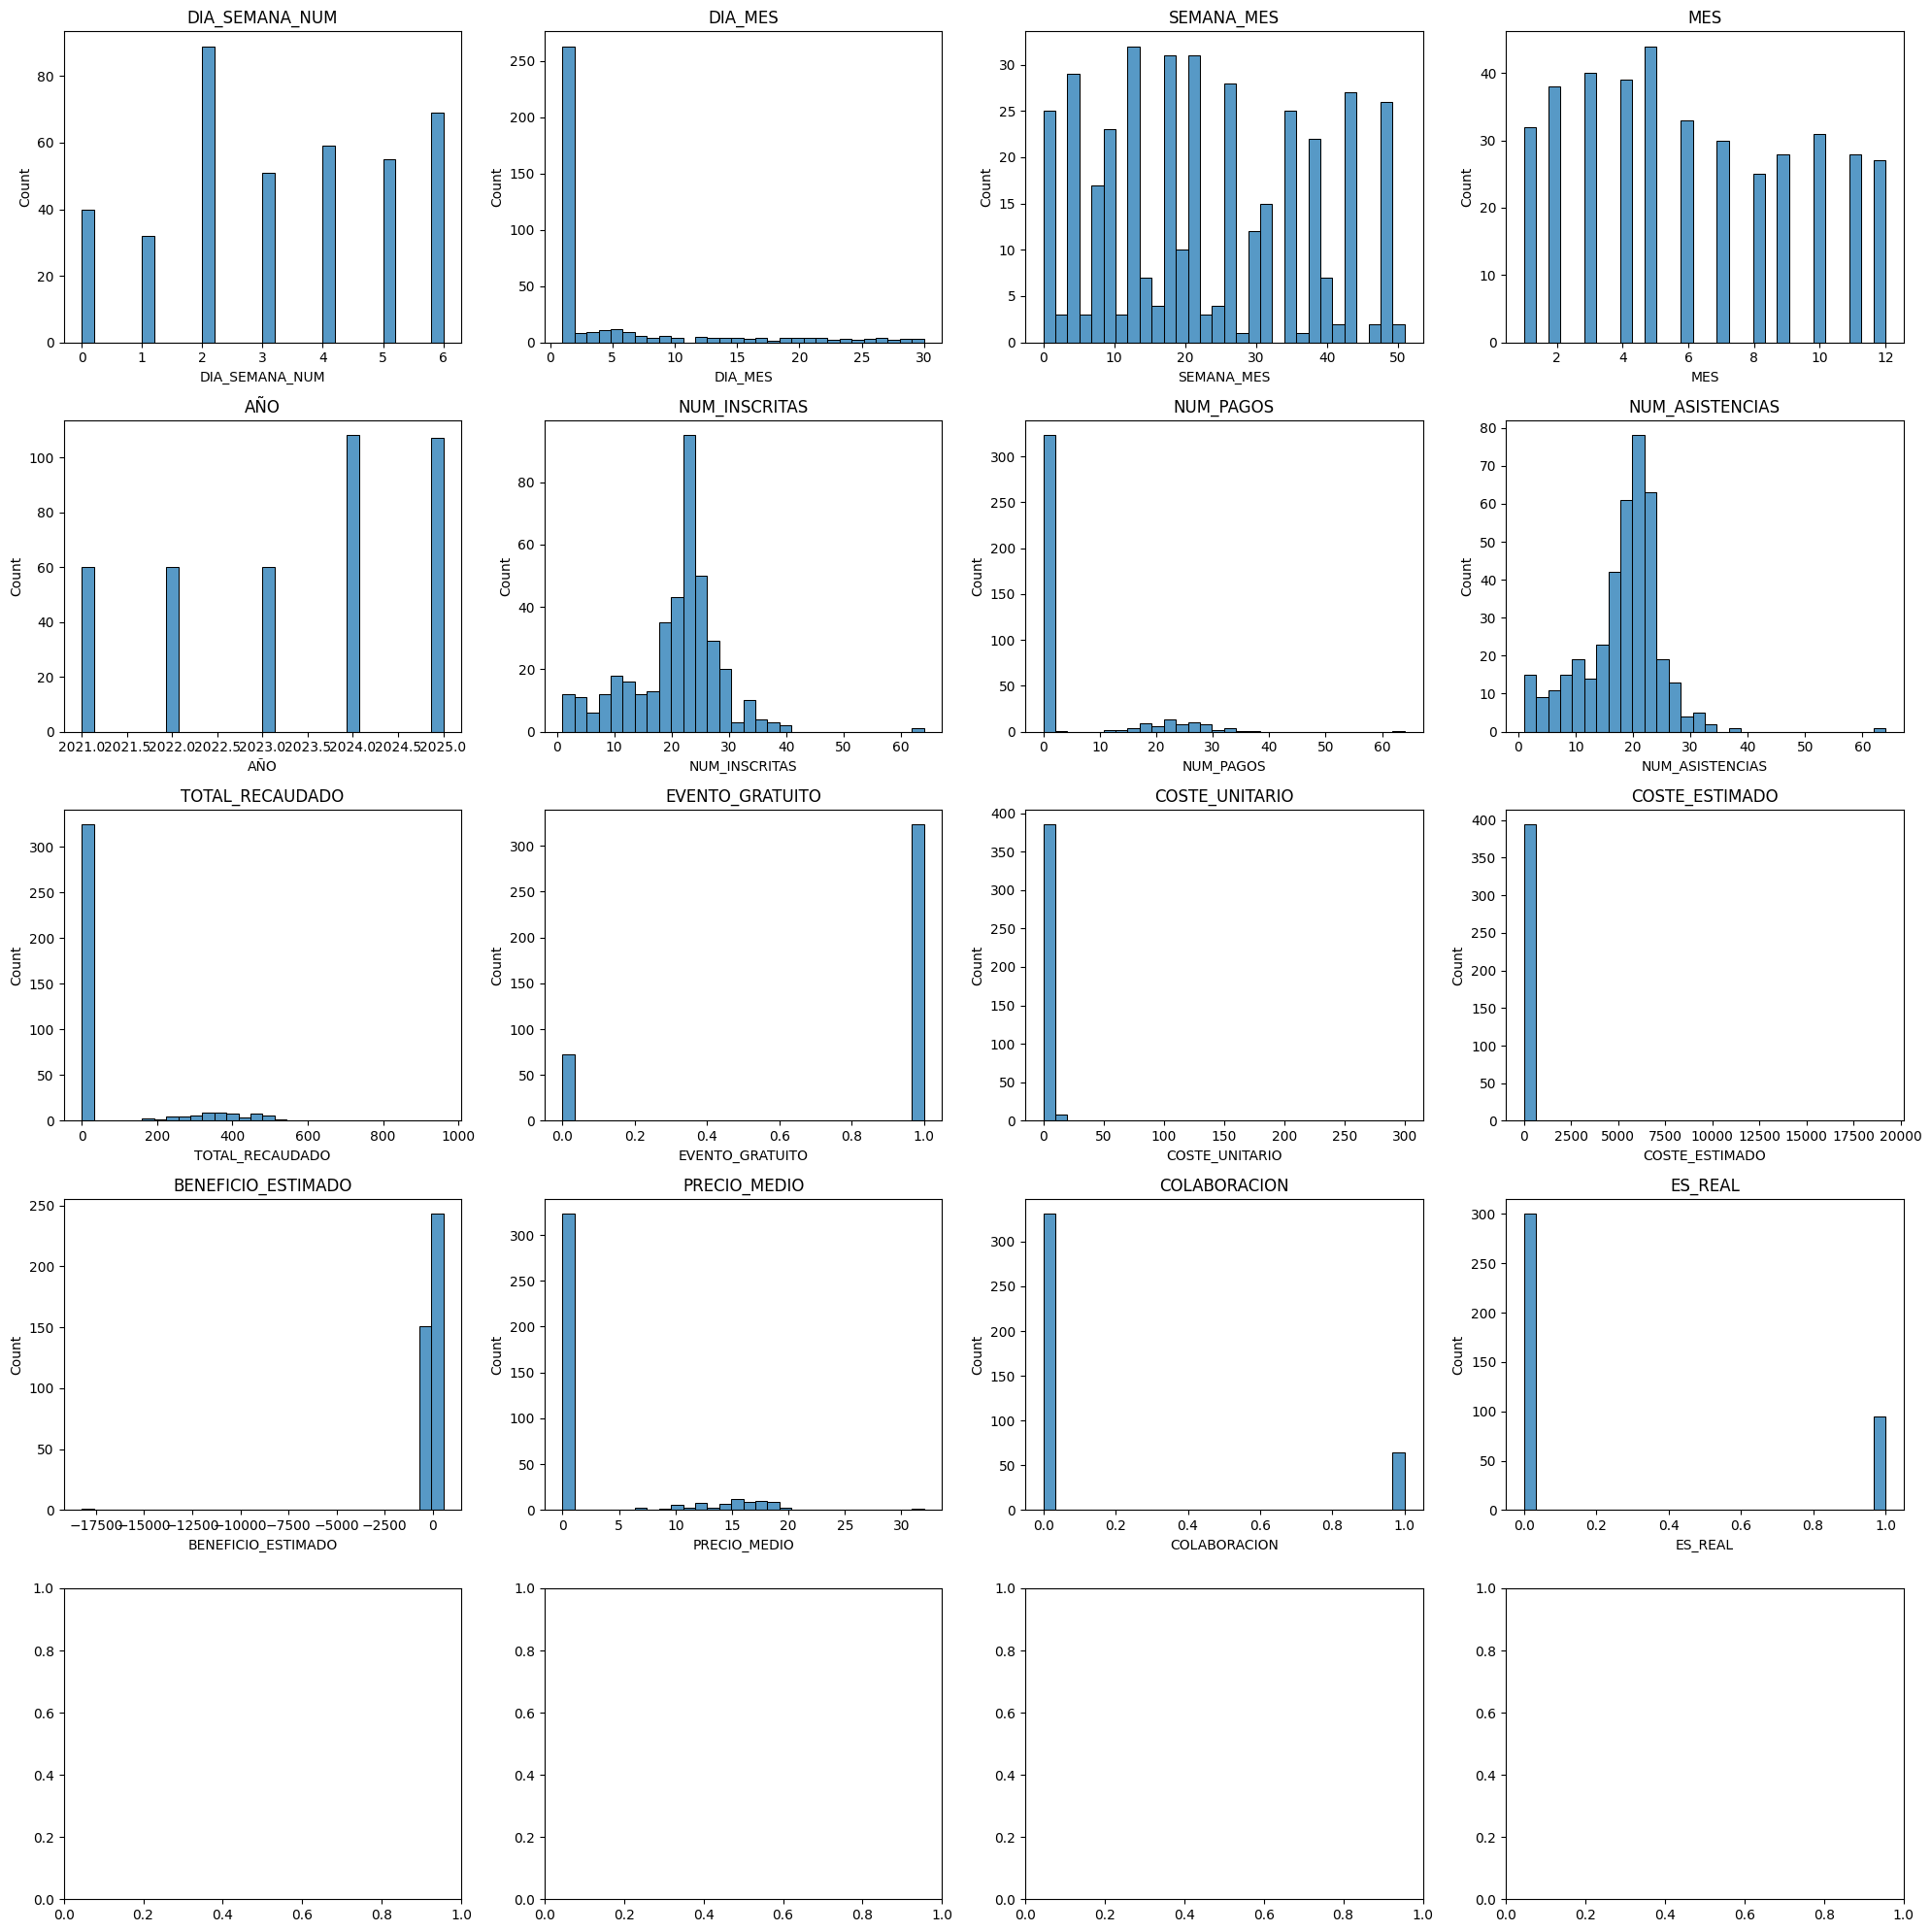

c:\Users\evaru\OneDrive\Escritorio\sismiaio\sismia_env\Lib\site-packages\scipy\stats\_morestats.py:1153: UserWarning: The optimal lambda is 395.20728777681177, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


ValueError: Data must be positive.

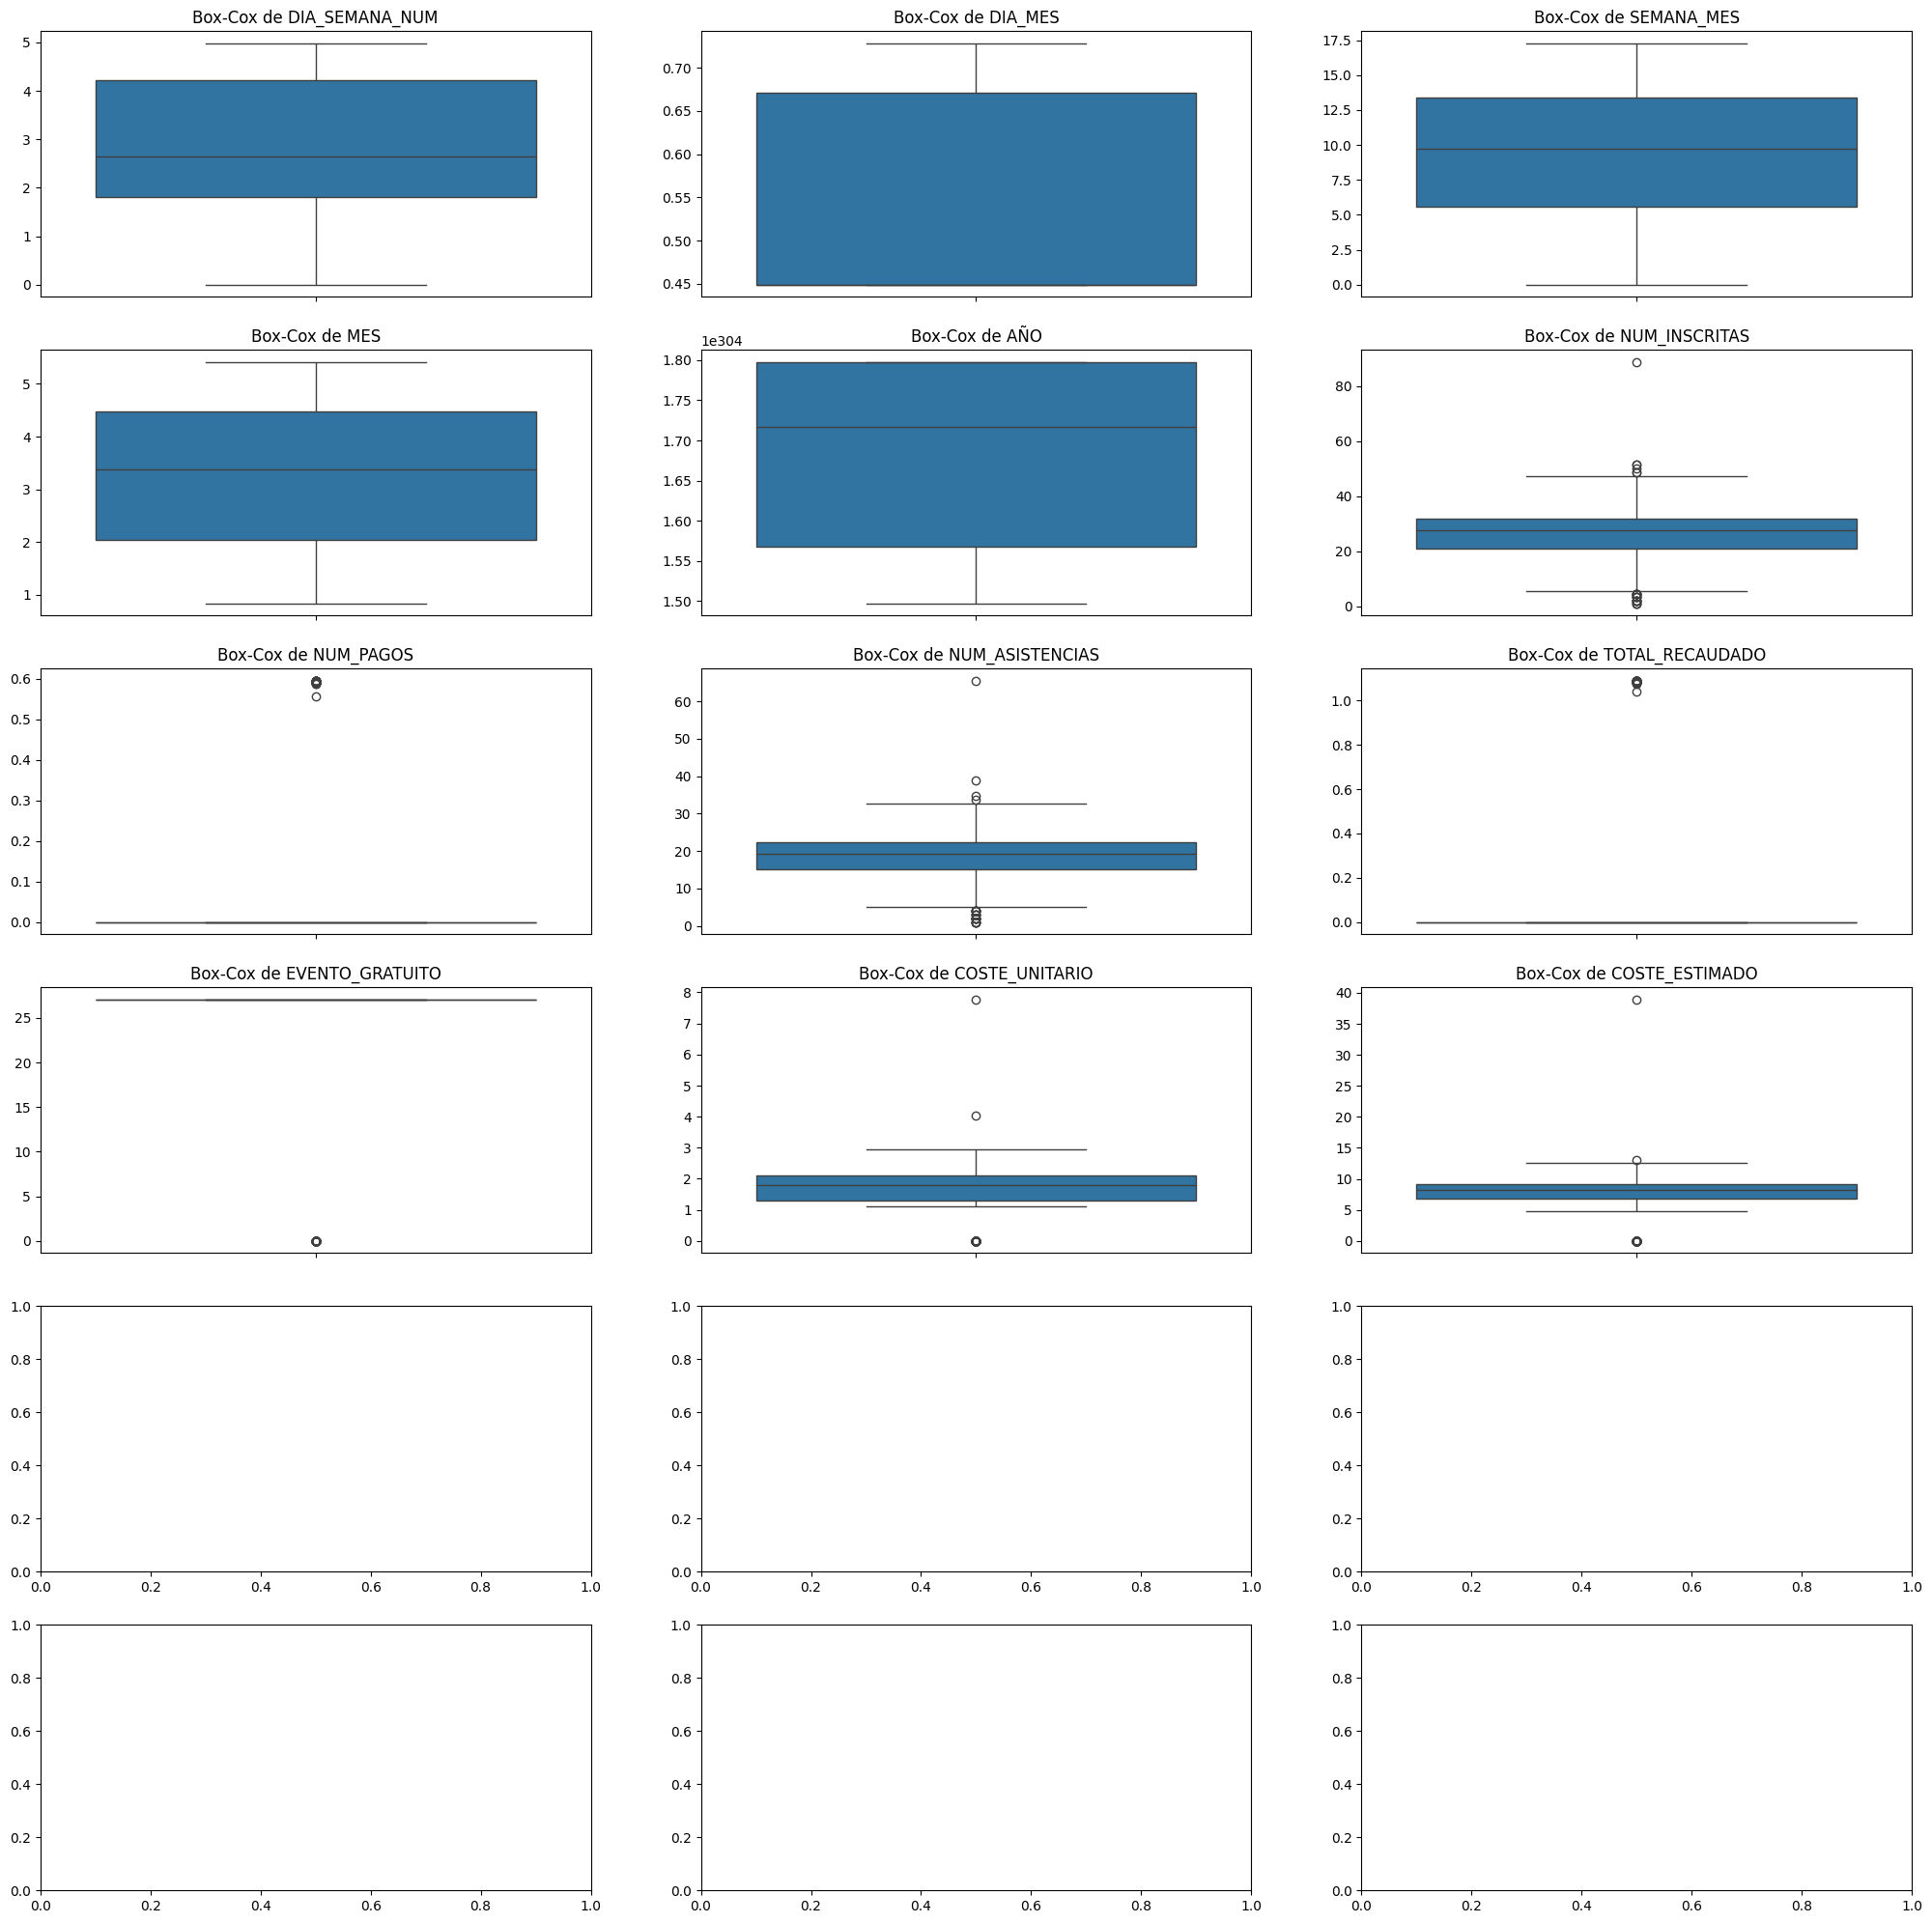

In [18]:
plot_numerical(df)
plot_numericalBox(df)
plot_categorical(df)


In [19]:
df.describe().T[["min"]]


,min
FECHA_EVENTO,2021-01-01 00:00:00
DIA_SEMANA_NUM,0.0
DIA_MES,1.0
SEMANA_MES,0.0
MES,1.0
AÑO,2021.0
NUM_INSCRITAS,1.0
NUM_PAGOS,0.0
NUM_ASISTENCIAS,1.0
TOTAL_RECAUDADO,0.0


In [20]:
df.loc[42, "BENEFICIO_ESTIMADO"] = 192
df.loc[42, "COSTE_UNITARIO"] = 12
df.loc[42, "TIPO_ACTIVIDAD"] = "social"
df.loc[42, "COLABORACION"] = 1


In [21]:
columna = "BENEFICIO_ESTIMADO"
df_negativos = df[df[columna] < 0]

print(f"🔍 Hay {len(df_negativos)} fila(s) con {columna} negativo:")
display(df_negativos)




🔍 Hay 244 fila(s) con BENEFICIO_ESTIMADO negativo:


,NOMBRE_EVENTO,FECHA_EVENTO,COMUNIDAD,DIA_SEMANA,DIA_SEMANA_NUM,DIA_MES,SEMANA_MES,MES,AÑO,TEMPORADA,...,TOTAL_RECAUDADO,EVENTO_GRATUITO,TIPO_EVENTO,COSTE_UNITARIO,COSTE_ESTIMADO,BENEFICIO_ESTIMADO,PRECIO_MEDIO,COLABORACION,TIPO_ACTIVIDAD,ES_REAL
75,Pre Xmas Runbrunch Elche,2024-12-22,ELCHE,Sunday,6,22,51,12,2024,invierno,...,133.0,0,pago,10.000000,190.00,-57.00,7.0,0,almuerzo,1
79,Rundeo By Primetime I Sisterhood,2025-05-09,GIRONA,Friday,4,9,19,5,2025,primavera,...,960.0,0,pago,300.000000,19200.00,-18240.00,15.0,0,ludica,1
95,Sisterhood Free 1,2021-01-01,GIRONA,Friday,4,1,0,1,2021,invierno,...,0.0,1,gratuito,2.386364,52.50,-52.50,0.0,0,ludico,0
96,Sisterhood Free 2,2021-01-01,GIRONA,Friday,4,1,0,1,2021,invierno,...,0.0,1,gratuito,3.385909,74.49,-74.49,0.0,1,almuerzo,0
97,Sisterhood Free 3,2021-01-01,GIRONA,Friday,4,1,0,1,2021,invierno,...,0.0,1,gratuito,4.755769,123.65,-123.65,0.0,1,deportiva,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,Sisterhood Free 294,2025-11-01,GIRONA,Saturday,5,1,43,11,2025,otoño,...,0.0,1,gratuito,2.231852,60.26,-60.26,0.0,0,deportiva,0
390,Sisterhood Free 296,2025-12-01,GIRONA,Monday,0,1,48,12,2025,invierno,...,0.0,1,gratuito,3.233462,84.07,-84.07,0.0,0,almuerzo,0
391,Sisterhood Free 297,2025-12-01,GIRONA,Monday,0,1,48,12,2025,invierno,...,0.0,1,gratuito,2.687500,75.25,-75.25,0.0,0,ludico,0
392,Sisterhood Free 298,2025-12-01,GIRONA,Monday,0,1,48,12,2025,invierno,...,0.0,1,gratuito,2.670000,61.41,-61.41,0.0,1,almuerzo,0


In [22]:
# Cambiar valores manualmente en la fila 79
df.loc[79, "COSTE_UNITARIO"] = 11  
df.loc[79, "COSTE_ESTIMADO"] = 704
df.loc[79, "BENEFICIO_ESTIMADO"] = 256

print("✅ Cambios manuales aplicados.")


✅ Cambios manuales aplicados.


In [23]:
# Filtrar eventos gratuitos
df_gratuitos = df[df["TIPO_EVENTO"] == "gratuito"]

# Mostrar eventos gratuitos
print(f"🔍 Hay {len(df_gratuitos)} evento(s) gratuitos:")
display(df_gratuitos)


🔍 Hay 323 evento(s) gratuitos:


,NOMBRE_EVENTO,FECHA_EVENTO,COMUNIDAD,DIA_SEMANA,DIA_SEMANA_NUM,DIA_MES,SEMANA_MES,MES,AÑO,TEMPORADA,...,TOTAL_RECAUDADO,EVENTO_GRATUITO,TIPO_EVENTO,COSTE_UNITARIO,COSTE_ESTIMADO,BENEFICIO_ESTIMADO,PRECIO_MEDIO,COLABORACION,TIPO_ACTIVIDAD,ES_REAL
2,Dimecres Morning Run Cet,2024-05-01,GIRONA,Wednesday,2,1,18,5,2024,primavera,...,0.0,1,gratuito,0.000000,0.00,0.00,0.0,0,only run,1
3,Els Dimecres Amb Sisterhood,2024-02-14,GIRONA,Wednesday,2,14,7,2,2024,invierno,...,0.0,1,gratuito,0.000000,0.00,0.00,0.0,0,only run,1
4,Els Dimecres Amb Sisterhood,2024-02-21,GIRONA,Wednesday,2,21,8,2,2024,invierno,...,0.0,1,gratuito,0.000000,0.00,0.00,0.0,0,only run,1
5,Els Dimecres Amb Sisterhood,2024-02-28,GIRONA,Wednesday,2,28,9,2,2024,invierno,...,0.0,1,gratuito,0.000000,0.00,0.00,0.0,0,only run,1
6,Els Dimecres Amb Sisterhood,2024-03-13,GIRONA,Wednesday,2,13,11,3,2024,primavera,...,0.0,1,gratuito,0.000000,0.00,0.00,0.0,0,only run,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,Sisterhood Free 294,2025-11-01,GIRONA,Saturday,5,1,43,11,2025,otoño,...,0.0,1,gratuito,2.231852,60.26,-60.26,0.0,0,deportiva,0
390,Sisterhood Free 296,2025-12-01,GIRONA,Monday,0,1,48,12,2025,invierno,...,0.0,1,gratuito,3.233462,84.07,-84.07,0.0,0,almuerzo,0
391,Sisterhood Free 297,2025-12-01,GIRONA,Monday,0,1,48,12,2025,invierno,...,0.0,1,gratuito,2.687500,75.25,-75.25,0.0,0,ludico,0
392,Sisterhood Free 298,2025-12-01,GIRONA,Monday,0,1,48,12,2025,invierno,...,0.0,1,gratuito,2.670000,61.41,-61.41,0.0,1,almuerzo,0


In [24]:
# Modificar los valores a 0 para eventos gratuitos
df.loc[df["TIPO_EVENTO"] == "gratuito", ["COSTE_UNITARIO", "COSTE_ESTIMADO", "BENEFICIO_ESTIMADO"]] = 0.0

print("✅ Campos actualizados correctamente para los eventos gratuitos.")

✅ Campos actualizados correctamente para los eventos gratuitos.


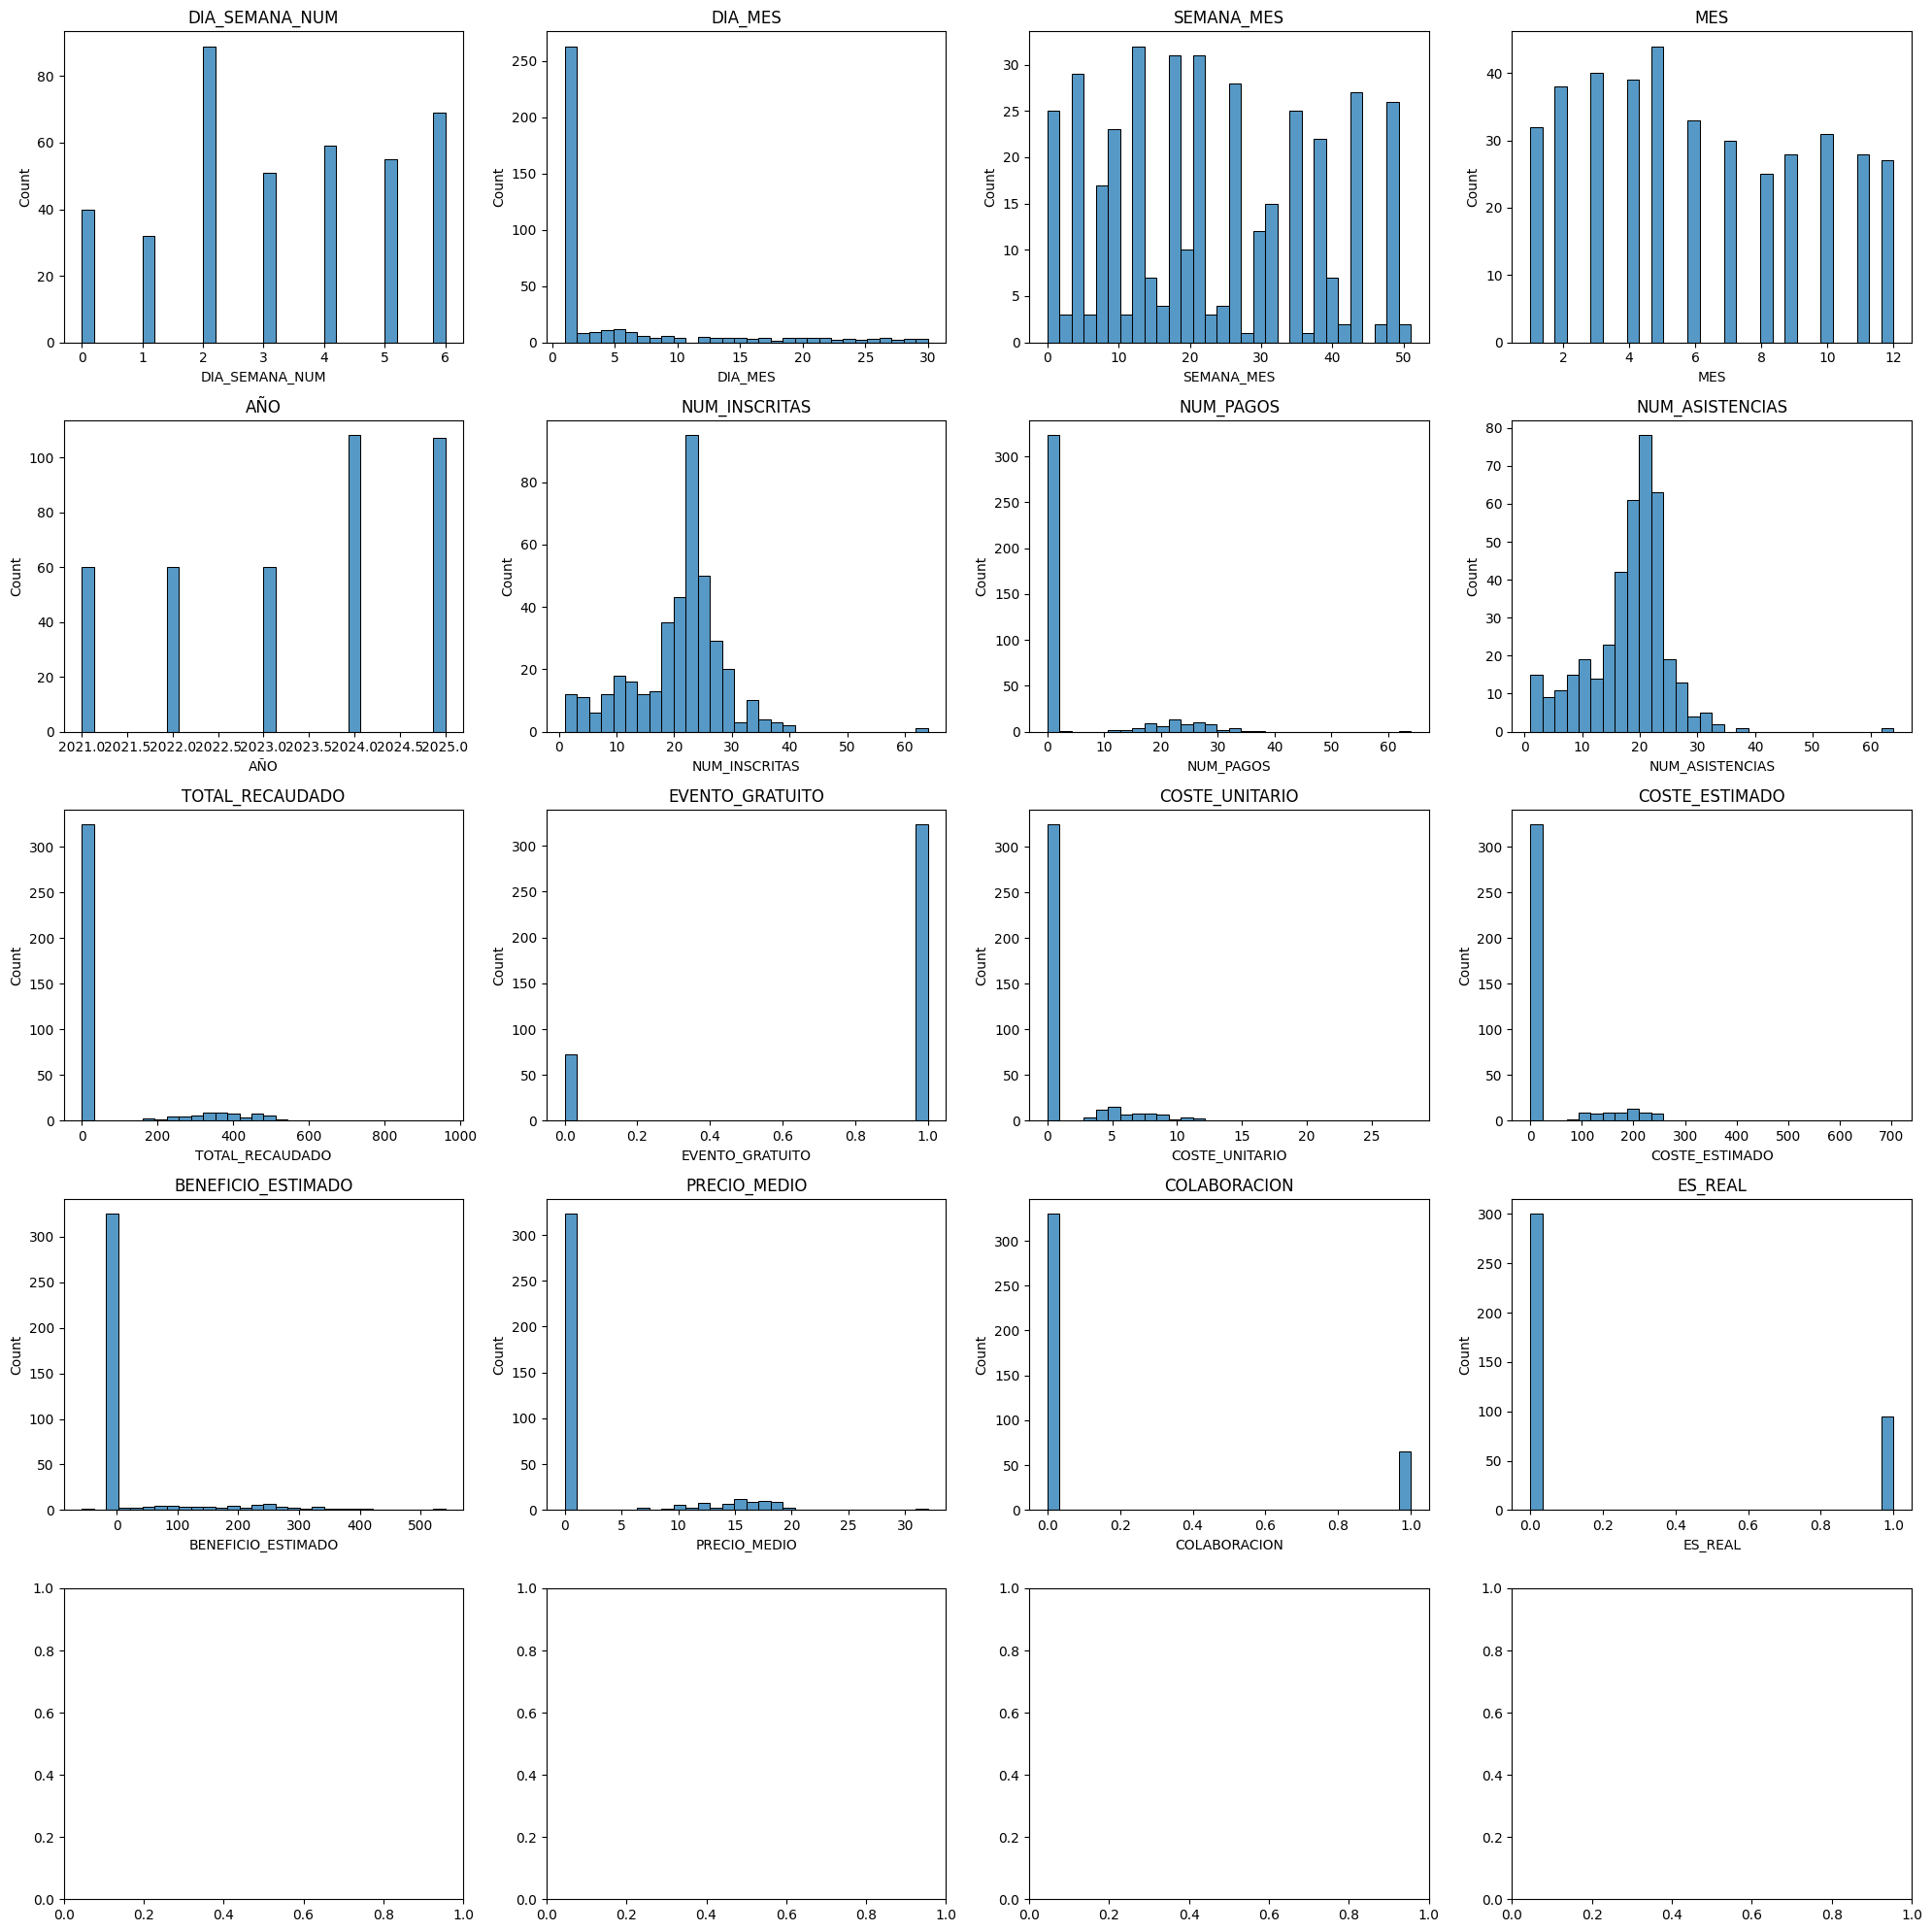

c:\Users\evaru\OneDrive\Escritorio\sismiaio\sismia_env\Lib\site-packages\scipy\stats\_morestats.py:1153: UserWarning: The optimal lambda is 395.20728777681177, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


ValueError: Data must be positive.

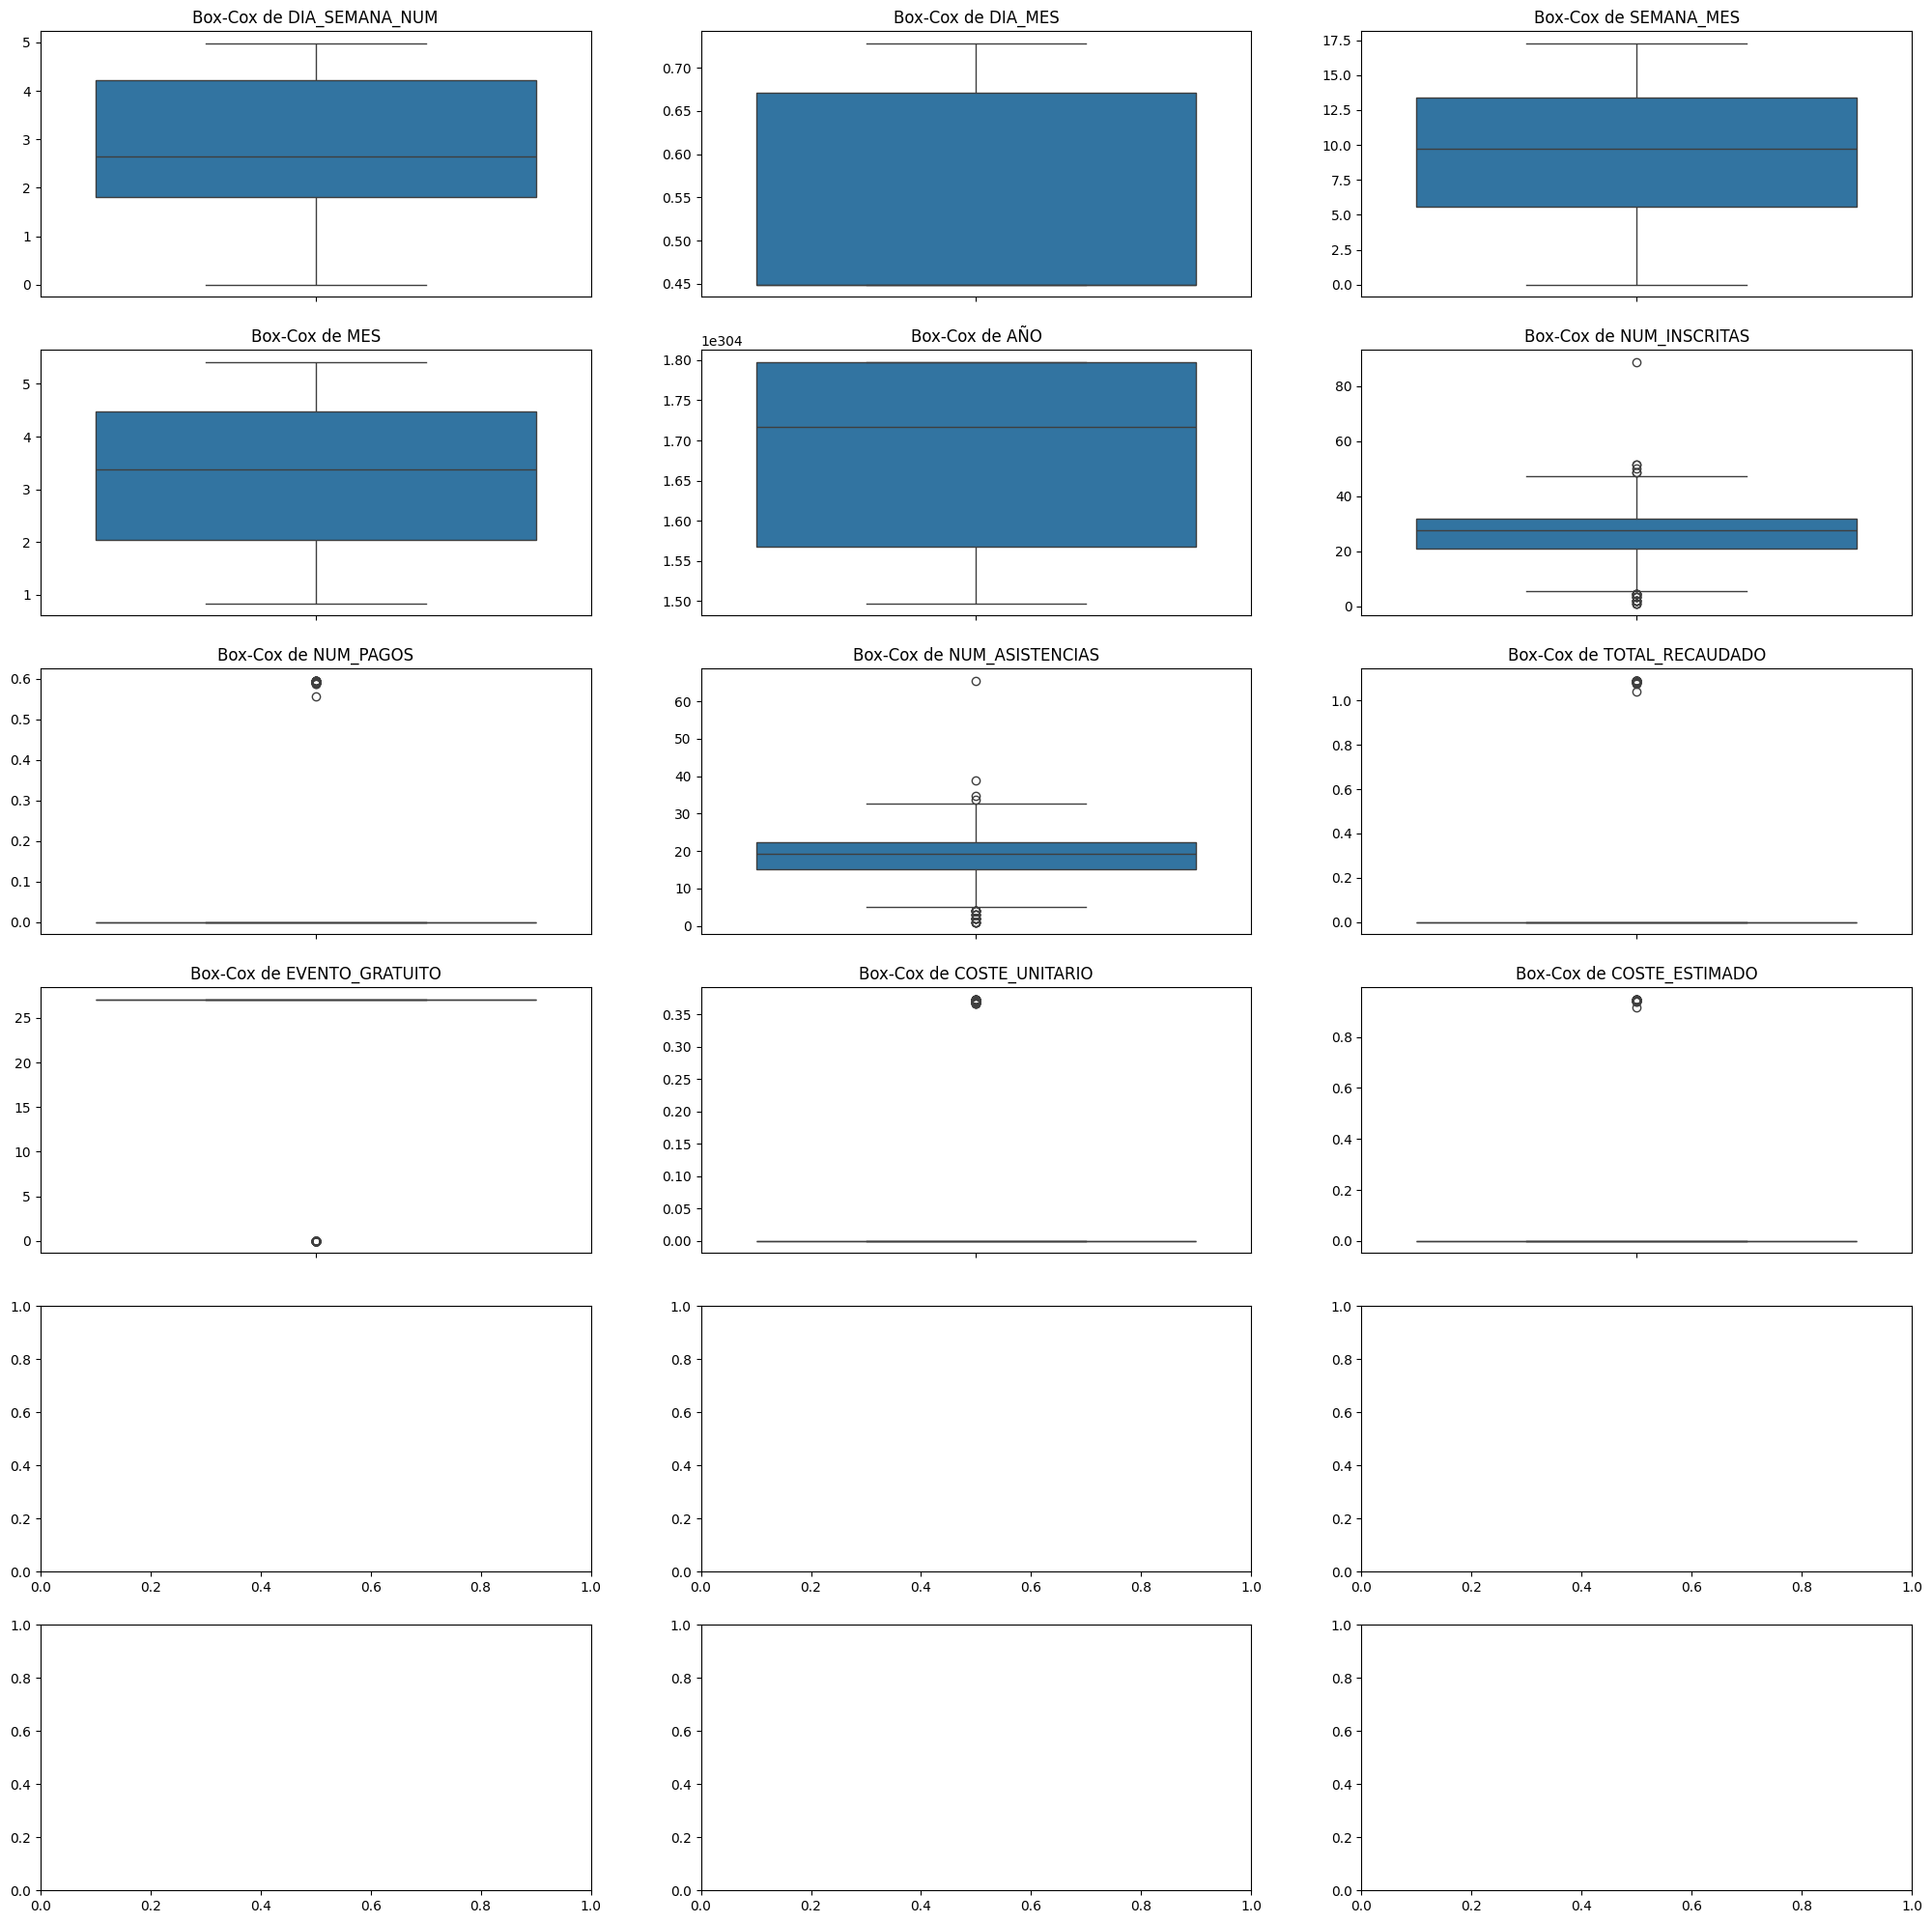

In [25]:
plot_numerical(df)
plot_numericalBox(df)
plot_categorical(df)

In [26]:
from sklearn.preprocessing import PowerTransformer

def plot_numericalBox(df):
    import math

    num_vbles = tipo_variables(df)[0]
    fig, axes = plt.subplots(math.floor(len(num_vbles)/3)+1, 3, figsize=(25, 25))
    axes = axes.flatten()

    transformer = PowerTransformer(method='yeo-johnson')  # Admite negativos

    for i, t in enumerate(num_vbles):
        data = df[t].dropna().values.reshape(-1, 1)
        transformed_data = transformer.fit_transform(data)
        sns.boxplot(y=transformed_data.flatten(), ax=axes[i])
        axes[i].set_title(f"Yeo-Johnson de {t}")
    
    plt.tight_layout()
    plt.show()


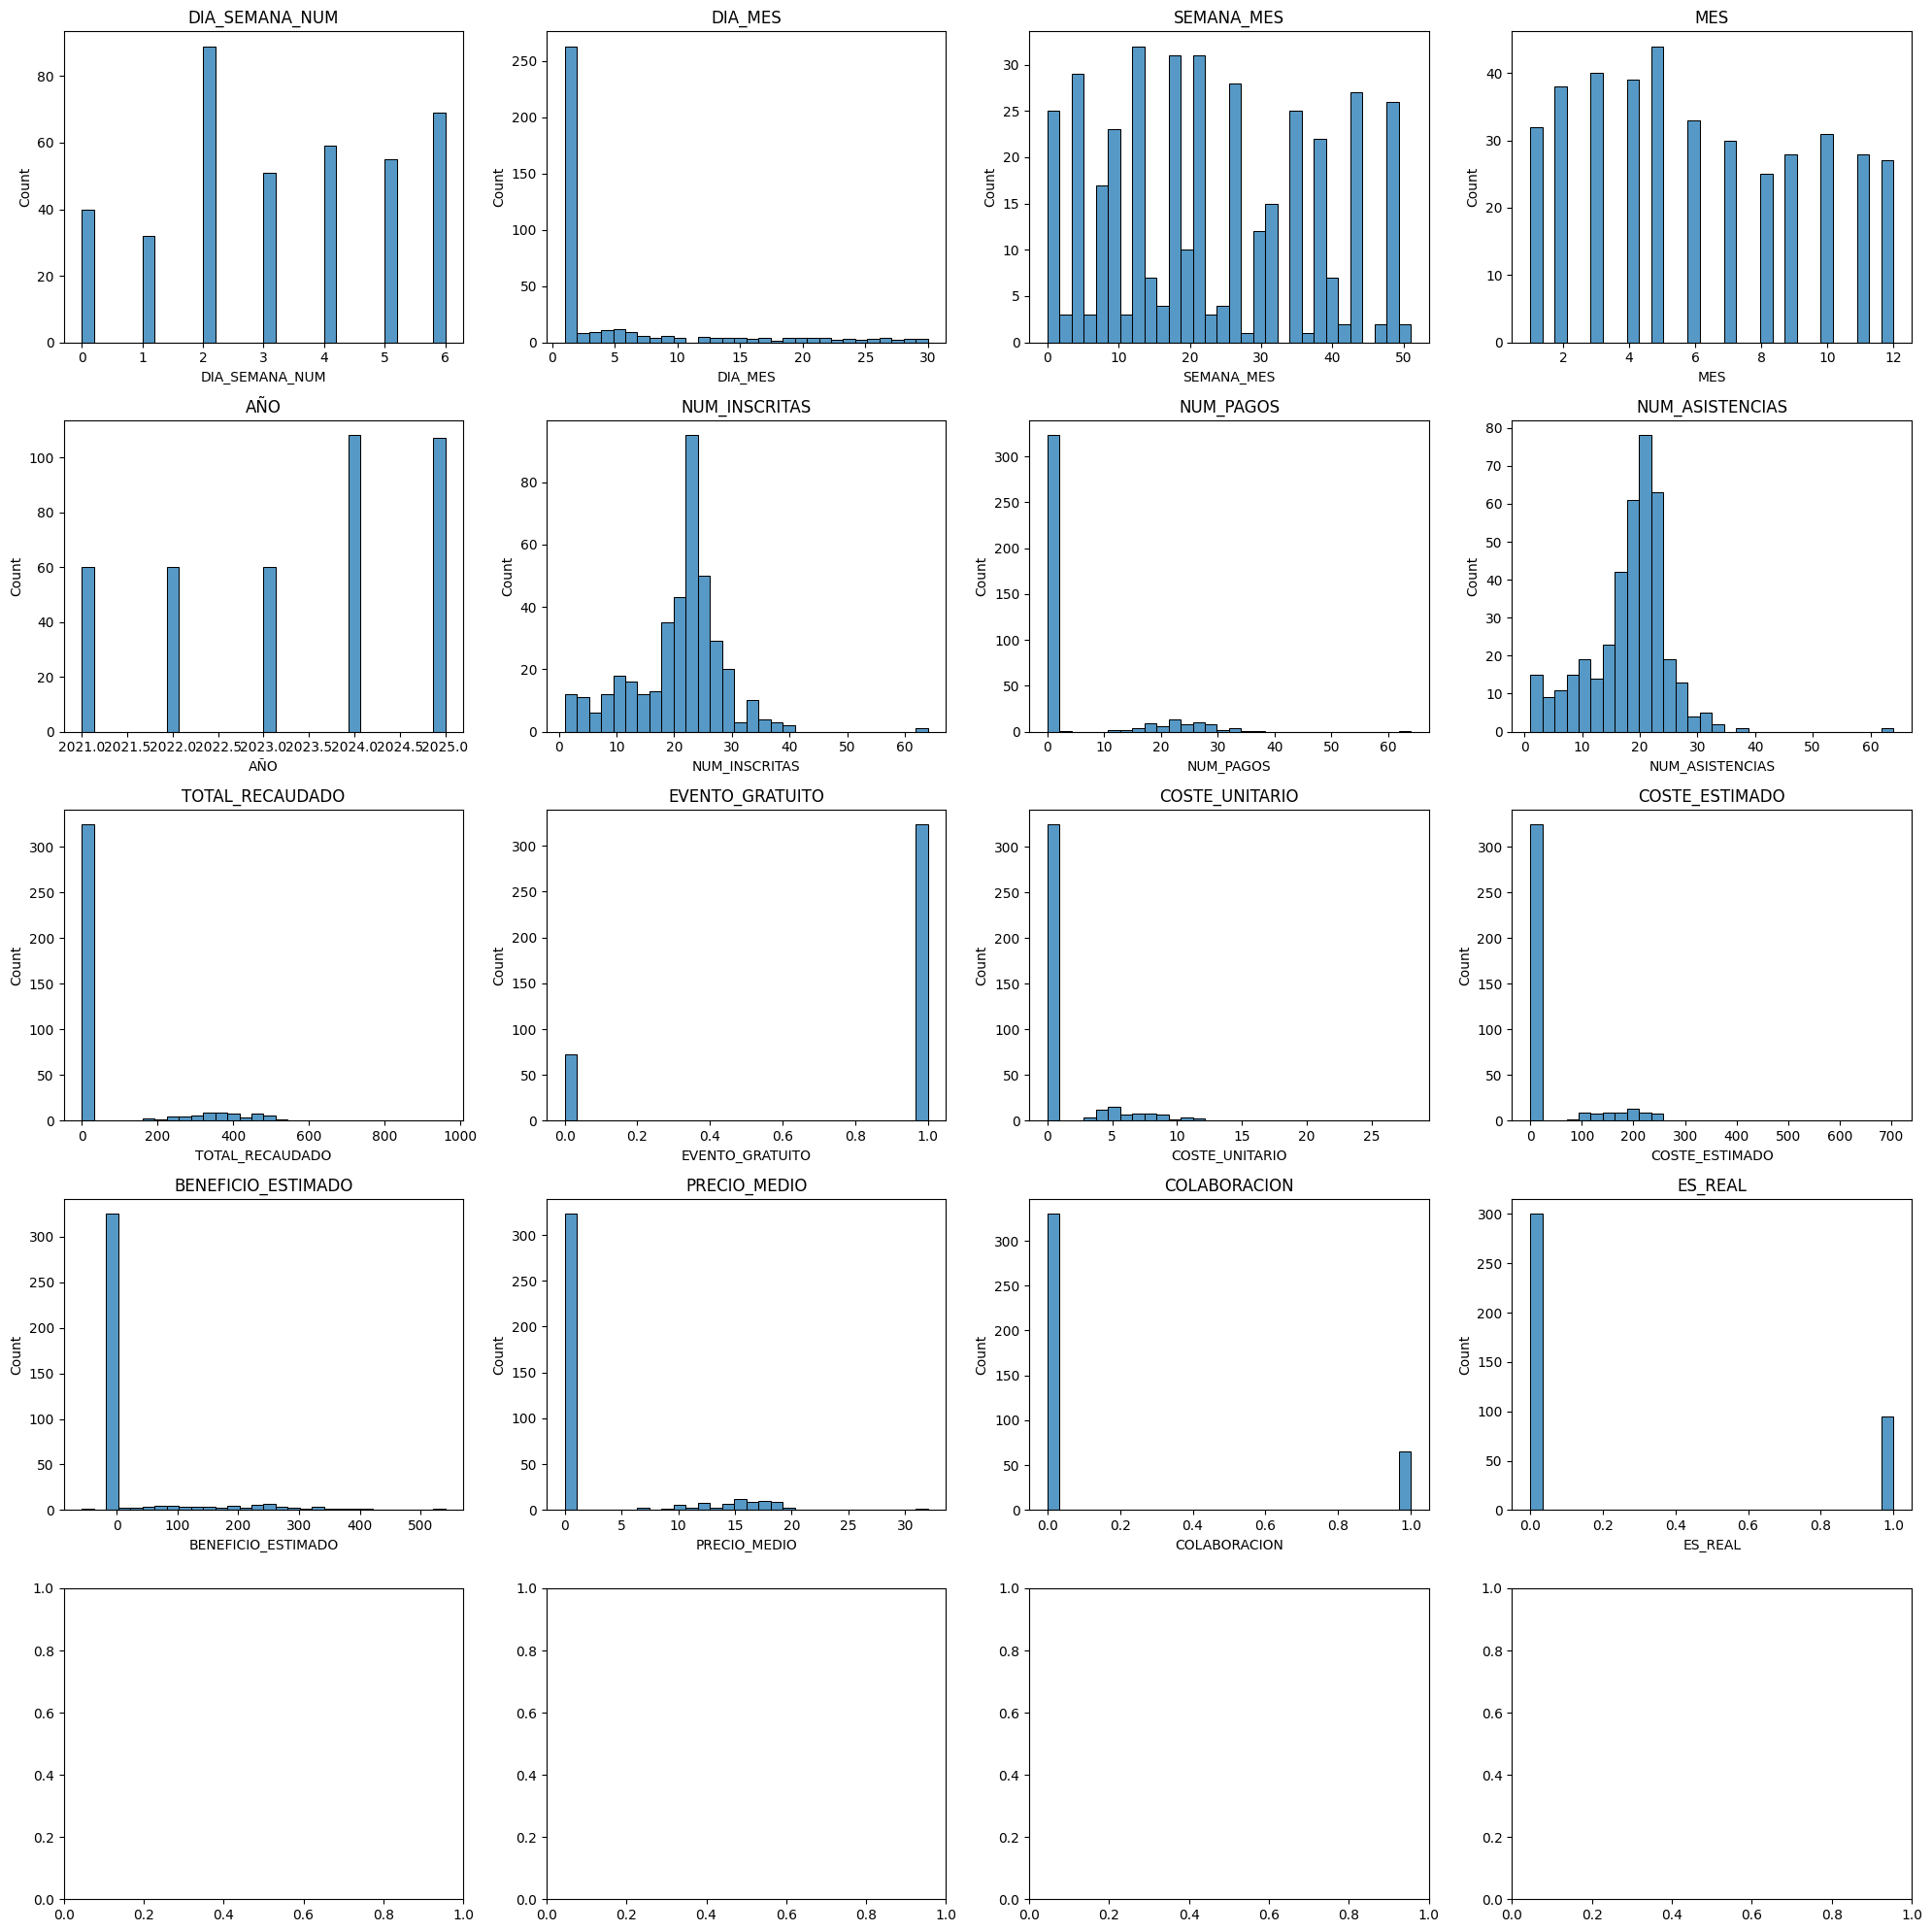

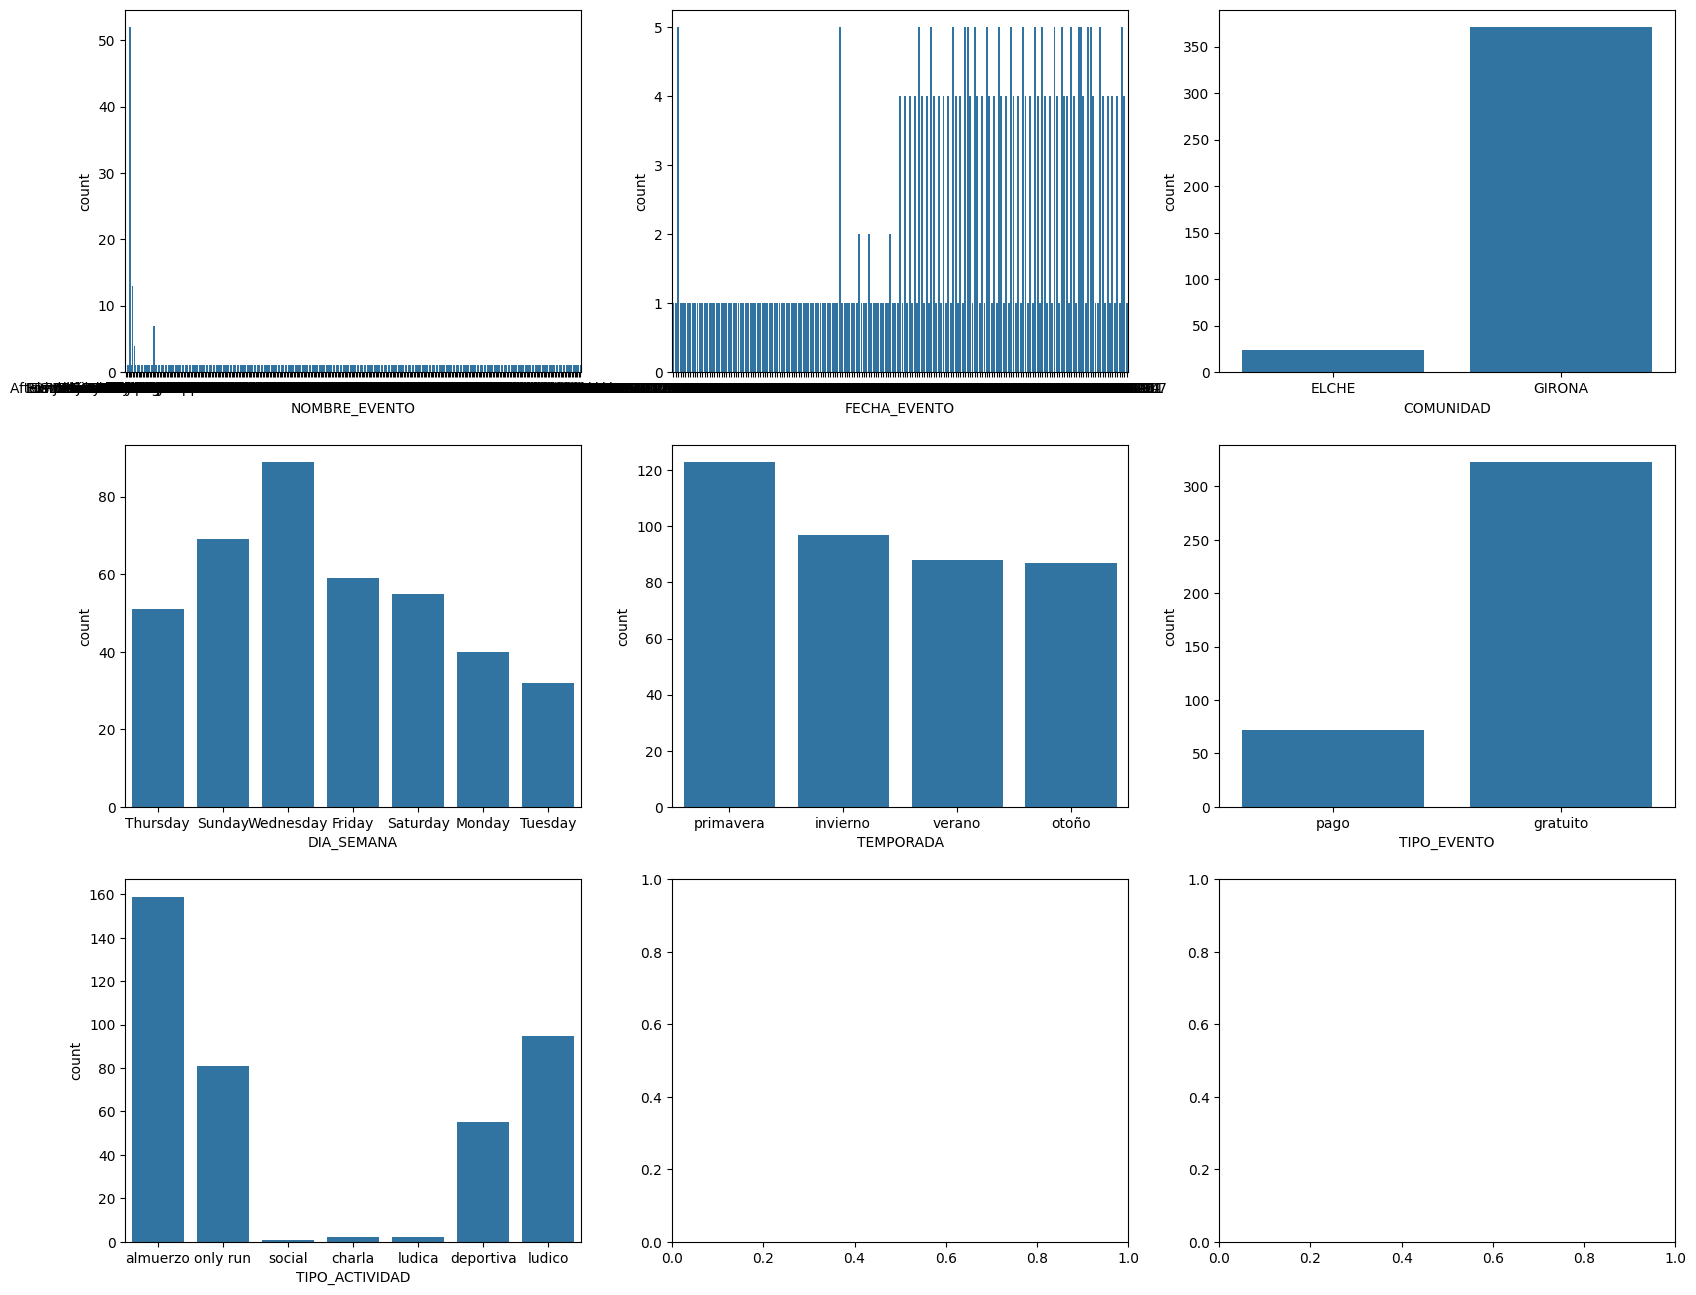

In [27]:
plot_numerical(df)
plot_categorical(df)

In [28]:
df["COMUNIDAD"] = df["COMUNIDAD"].str.strip().str.upper()
df["TIPO_EVENTO"] = df["TIPO_EVENTO"].str.strip().str.lower()

df_filtrado = df[(df["COMUNIDAD"] == "GIRONA") & (df["TIPO_EVENTO"] == "pago")].copy()
df_reales = df_filtrado[df_filtrado["ES_REAL"] == 1]
df_ficticios = df_filtrado[df_filtrado["ES_REAL"] == 0]
print(f"Total eventos de pago en GIRONA: {len(df_filtrado)}")
print(f" - Reales: {len(df_reales)}")
print(f" - Ficticios: {len(df_ficticios)}")

Total eventos de pago en GIRONA: 66
 - Reales: 6
 - Ficticios: 60


In [29]:
df_filtrado.to_csv("dataset_Girona_pago.csv", index=False)

In [30]:
df = pd.read_csv("dataset_Girona_pago.csv")
df["COMUNIDAD"] = df["COMUNIDAD"].str.strip().str.upper()
df["TIPO_EVENTO"] = df["TIPO_EVENTO"].str.strip().str.lower()
print(df["COMUNIDAD"].unique())
print(df["TIPO_EVENTO"].unique())


['GIRONA']
['pago']


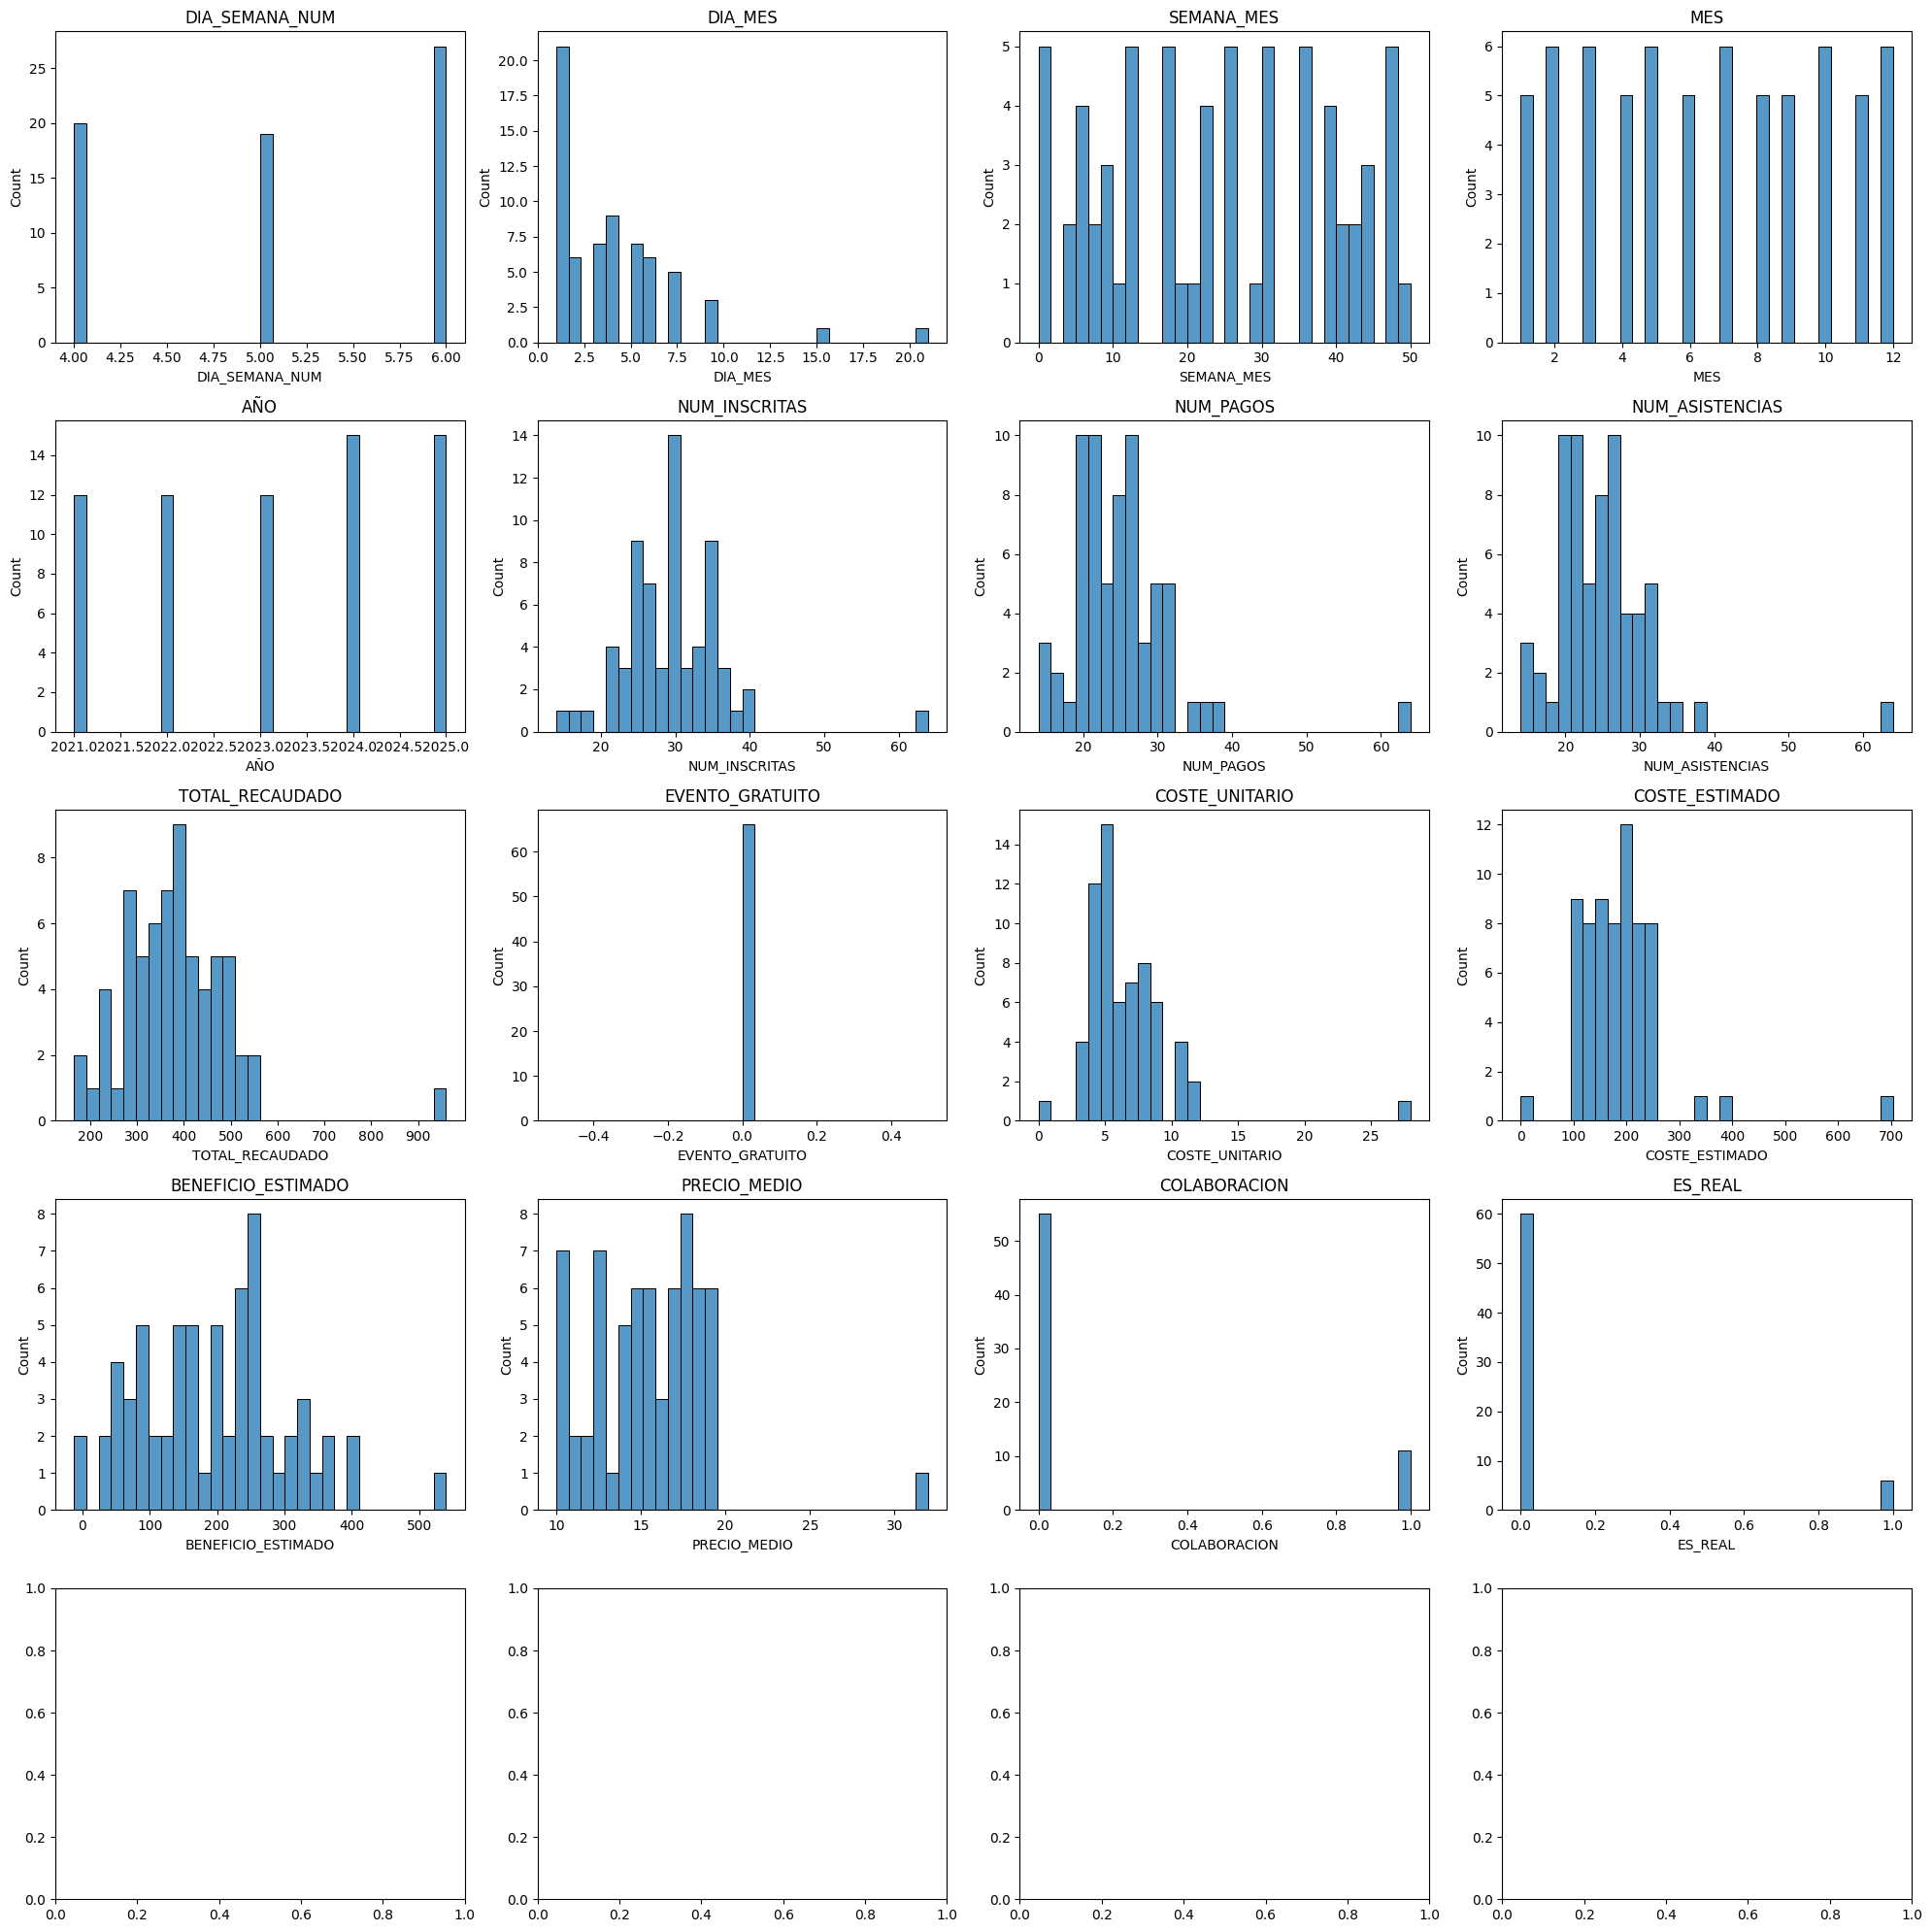

c:\Users\evaru\OneDrive\Escritorio\sismiaio\sismia_env\Lib\site-packages\sklearn\preprocessing\_data.py:3475: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

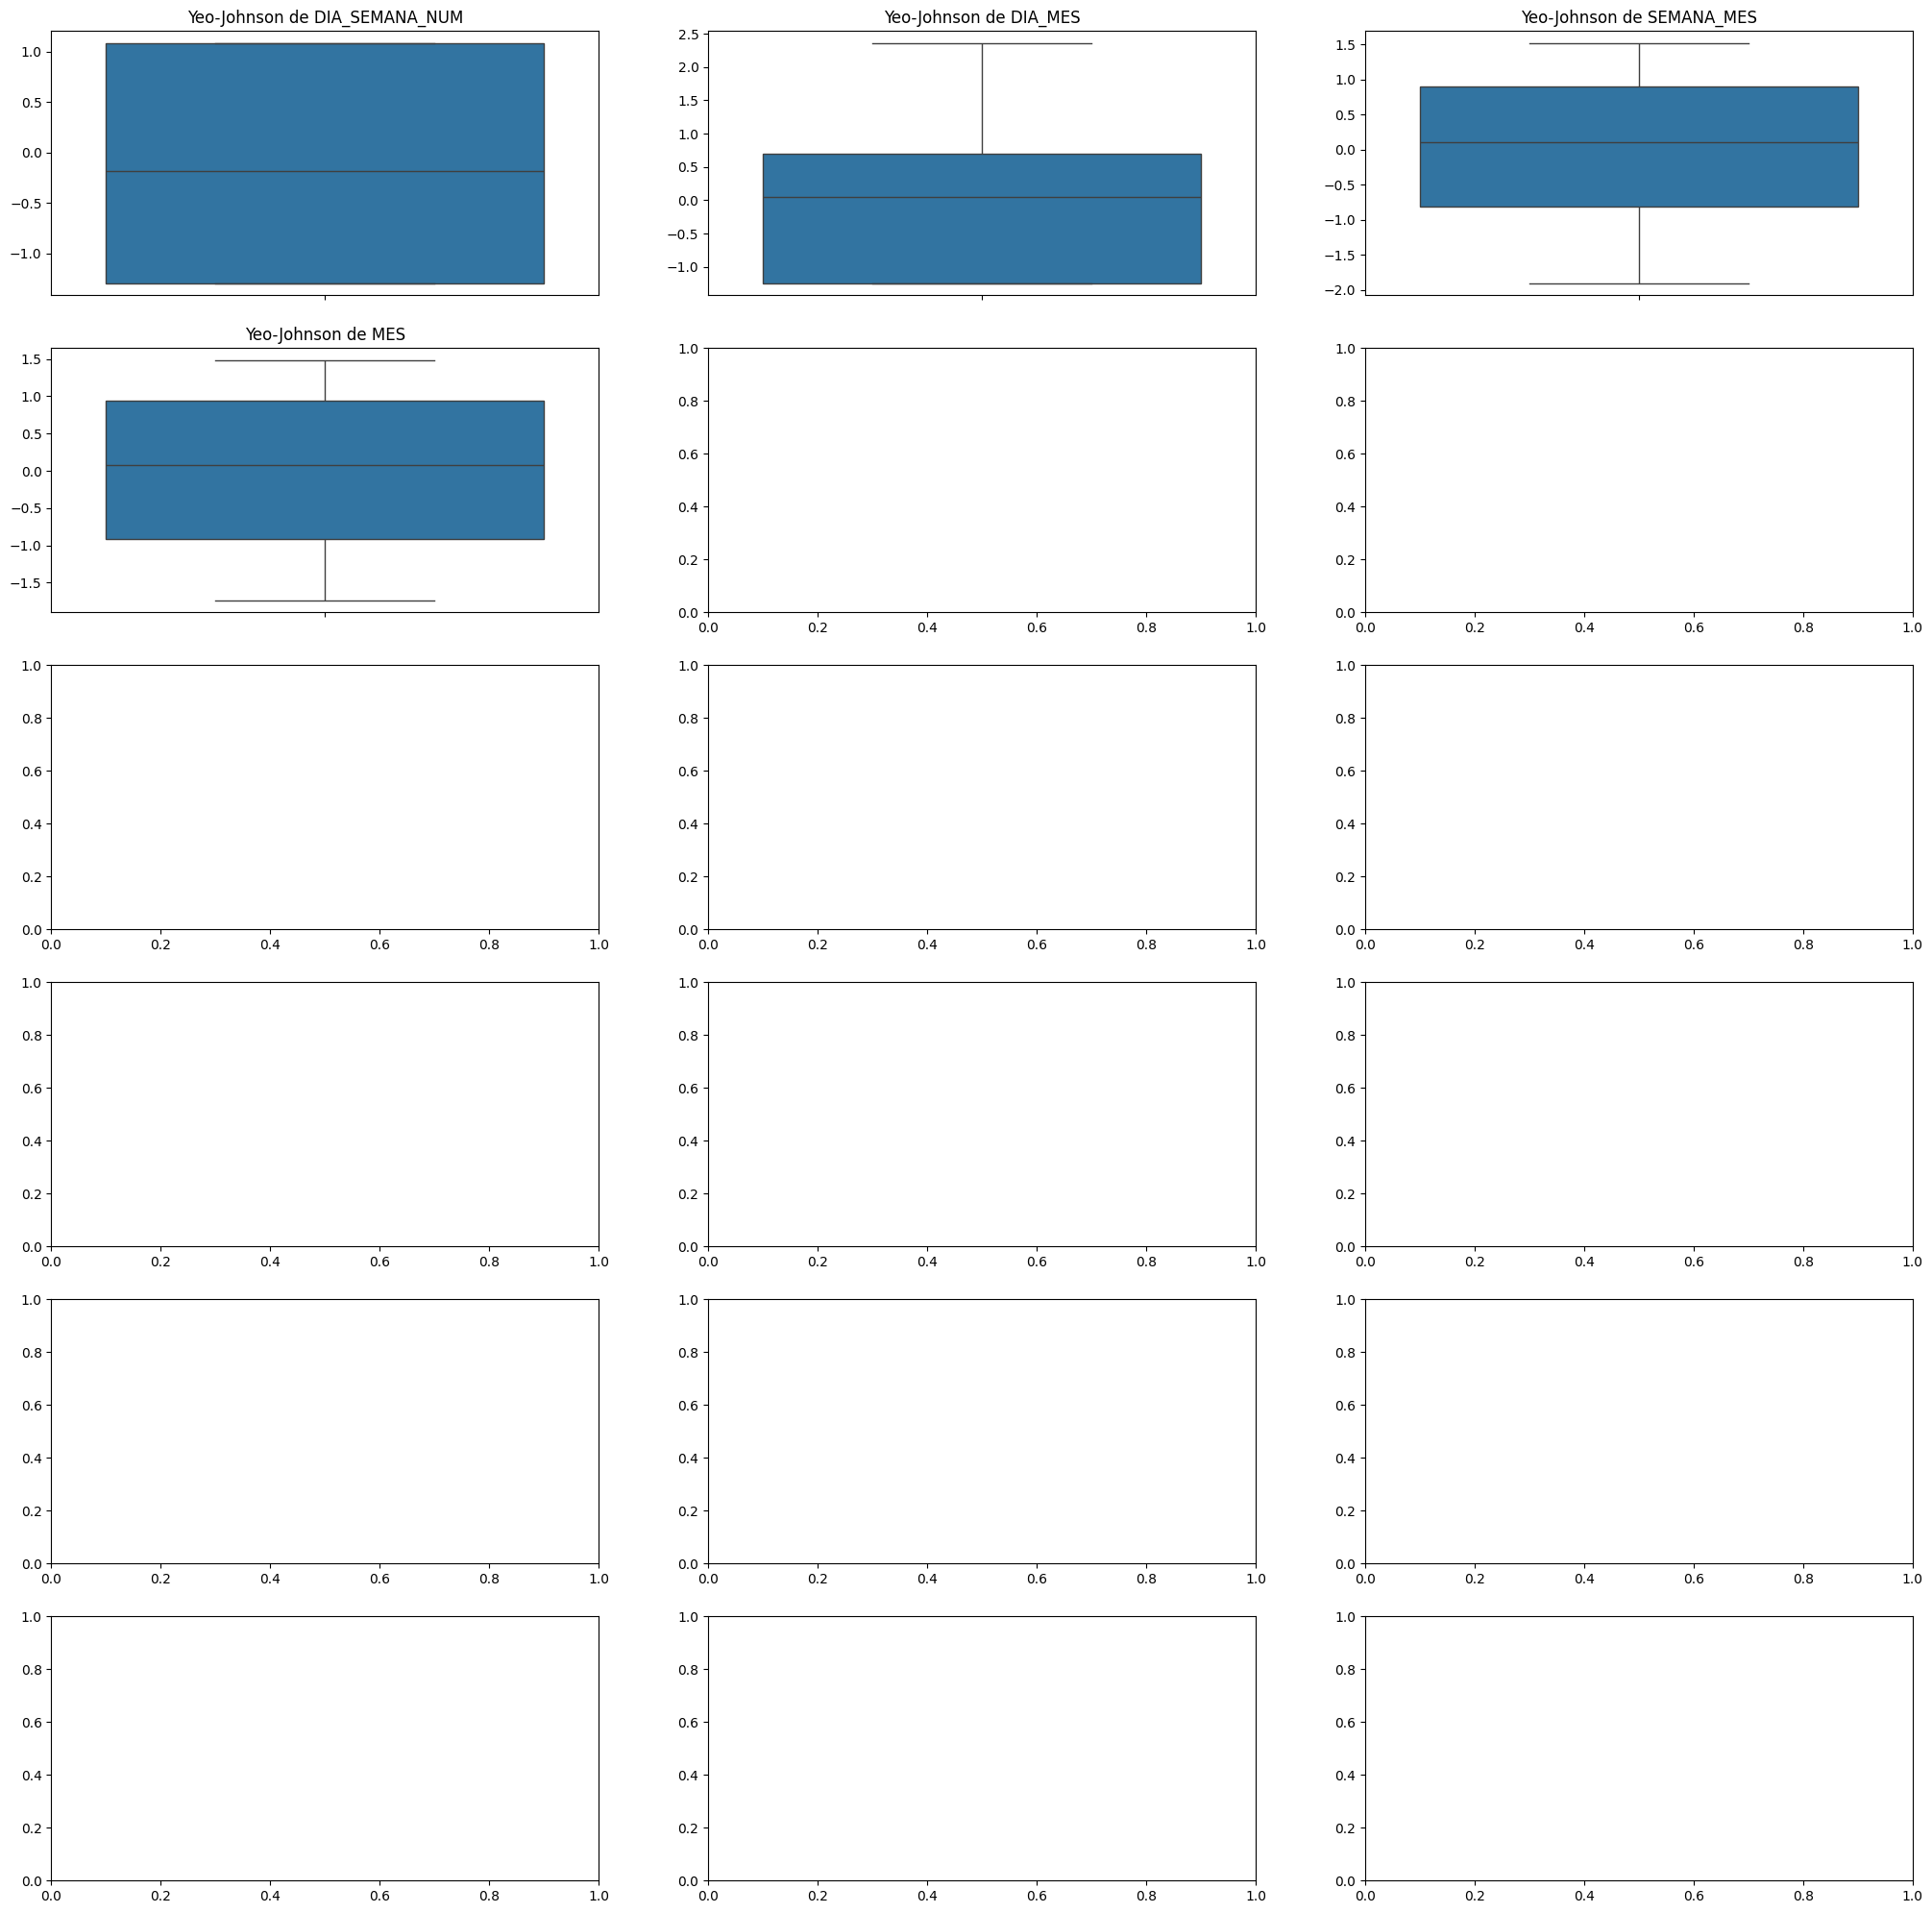

In [31]:
plot_numerical(df)
plot_numericalBox(df)
plot_categorical(df)
